# Taller 1 - Ingeniería de caracteristicas en Python
###Catalina Piedrahita Jaramillo
###Daniel José Rueda Lobato
###Diego Andrés Valderrama

###DATASET - Ingresos de Adultos
Enlace Dataset: https://www.kaggle.com/wenruliu/adult-income-dataset

Sitio Oficial: http://www.cs.toronto.edu/~delve/data/adult/adultDetail.html

Explicación de variables: http://www.cs.toronto.edu/~delve/data/adult/adultDetail.html

In [1]:
#Conectar con google drive
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
!pip install gower

  Created wheel for gower: filename=gower-0.0.5-cp36-none-any.whl size=4232 sha256=fbc5070d6647b09adef9c353ec0eb22ce14517bfcc991b05978990ffbc422811
  Stored in directory: /root/.cache/pip/wheels/c0/09/9b/072d54d6ced0f43a179852e3f09532d0131e25ff7cb4e5ee75
Successfully built gower


In [4]:
import gower

In [5]:
#Ruta archivo
df = pd.read_csv('/content/gdrive/My Drive/Informe técnico I/Ingresos_de_Adultos.csv')

In [6]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [7]:
df = df[['age','capital-gain','capital-loss','hours-per-week','educational-num','workclass','fnlwgt','education','marital-status','occupation', 'relationship', 'race','gender','native-country', 'income']]

In [8]:
print(df.columns.values)  # Nombre de las columnas que contiene  el dataset

['age' 'capital-gain' 'capital-loss' 'hours-per-week' 'educational-num'
 'workclass' 'fnlwgt' 'education' 'marital-status' 'occupation'
 'relationship' 'race' 'gender' 'native-country' 'income']


*   Age: continuous. (Edad)
*   Workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. (Tipo de Trabajo)
*   fnlwgt: continuous. (Factor de Expansión)
*   Education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. (Nivel Educativo)
*   Education-num: continuous (Número de años que ha estudiado)
*   Marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. (Estado civil)
*   Occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. (Ocupación)
*   Relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. (Posición en la familia)
*   Race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. (Raza)
*   Sex: Female, Male. (Sexo)
*   Capital-gain: continuous (Ganancia capital)
*   Capital-loss: continuous. (Pérdida capital)
*   hours-per-week: continuous. (Horas de trabajo por semana)
*   Native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands. (Pais de Origen)

# **Identificación de valores faltantes e imputación**

In [9]:
df.info() #Información de las variables del DataSet

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   capital-gain     48842 non-null  int64 
 2   capital-loss     48842 non-null  int64 
 3   hours-per-week   48842 non-null  int64 
 4   educational-num  48842 non-null  int64 
 5   workclass        48842 non-null  object
 6   fnlwgt           48842 non-null  int64 
 7   education        48842 non-null  object
 8   marital-status   48842 non-null  object
 9   occupation       48842 non-null  object
 10  relationship     48842 non-null  object
 11  race             48842 non-null  object
 12  gender           48842 non-null  object
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [10]:
# Se identifican las variables númericas y las categoricas
categorical = [var for var in df.columns if df[var].dtype=='O']
print('Variables Categóricas:\n\n', categorical)

Variables Categóricas:

 ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']


In [11]:
# Se buscan valores nulos en las variables categóricas
df[categorical].isnull().sum()

workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
gender            0
native-country    0
income            0
dtype: int64

In [12]:
# Validamos el conteo de los diferentes valores de las variables categóricas
for var in categorical:   
    print(df[var].value_counts())

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         561

Se puede identificar que las variables categóricas no tienen un null como tal, sino que se identifican con signos de interrogación. Por lo tanto los campos con "?" son missing values.

Las categorias que contienen Missing Values son:
- workclass
- occupation
- native-country

In [13]:
# validamos el peso de los Missing Values de las diferentes categorias
for var in categorical:    
    print(df[var].value_counts()/np.float(len(df)))

Private             0.694198
Self-emp-not-inc    0.079071
Local-gov           0.064207
?                   0.057307
State-gov           0.040559
Self-emp-inc        0.034704
Federal-gov         0.029319
Without-pay         0.000430
Never-worked        0.000205
Name: workclass, dtype: float64
HS-grad         0.323164
Some-college    0.222718
Bachelors       0.164305
Masters         0.054400
Assoc-voc       0.042197
11th            0.037099
Assoc-acdm      0.032779
10th            0.028439
7th-8th         0.019553
Prof-school     0.017075
9th             0.015478
12th            0.013452
Doctorate       0.012162
5th-6th         0.010421
1st-4th         0.005057
Preschool       0.001699
Name: education, dtype: float64
Married-civ-spouse       0.458192
Never-married            0.329982
Divorced                 0.135805
Separated                0.031325
Widowed                  0.031080
Married-spouse-absent    0.012858
Married-AF-spouse        0.000758
Name: marital-status, dtype: float64


Porcentaje de Missing Values
- workclass 5.7%
- occupation 5.7%
- native-country 1.7%


In [14]:
#Reemplazamos el caracter "?" el cual previamente analizamos que es "Missing Value" por Null
df['workclass'].replace('?', np.NaN, inplace=True)
df['occupation'].replace('?', np.NaN, inplace=True)
df['native-country'].replace('?', np.NaN, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [15]:
# Validamos nuevamente la existencia de los NULL
df[categorical].isnull().sum()

workclass         2799
education            0
marital-status       0
occupation        2809
relationship         0
race                 0
gender               0
native-country     857
income               0
dtype: int64

In [16]:
(df['workclass'].isnull().sum()+df['occupation'].isnull().sum()+df['native-country'].isnull().sum())/len(df)

0.13236558699479956

In [17]:
# Encontramos las variables númericas
numerical = [var for var in df.columns if df[var].dtype!='O']
print('Las variables númericas son :', numerical)

Las variables númericas son : ['age', 'capital-gain', 'capital-loss', 'hours-per-week', 'educational-num', 'fnlwgt']


In [18]:
# Identificamos los "Missing Values"
df[numerical].isnull().sum()

age                0
capital-gain       0
capital-loss       0
hours-per-week     0
educational-num    0
fnlwgt             0
dtype: int64

No se encontraron valores nulos ni caracteres extraños en las variables númericas

Como podemos observar, solo 3 de las 9 variables categoricas poseen Mising Values, y estos no poseen un alto porcentaje dentro de su categoria (entre 1.7%  y 5.4%), motivo por el cual, se realizará una imputación de la moda a estos datos faltantes.

In [19]:
#Imputación de datos en variable categoricas, usando la moda
for df2 in [df]:
    df2['workclass'].fillna(df['workclass'].mode()[0], inplace=True)
    df2['occupation'].fillna(df['occupation'].mode()[0], inplace=True)
    df2['native-country'].fillna(df['native-country'].mode()[0], inplace=True)    

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [20]:
df2.shape

(48842, 15)

In [21]:
df2[categorical].isnull().sum()

workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
gender            0
native-country    0
income            0
dtype: int64

In [22]:
df['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

# **Estadística descriptiva**

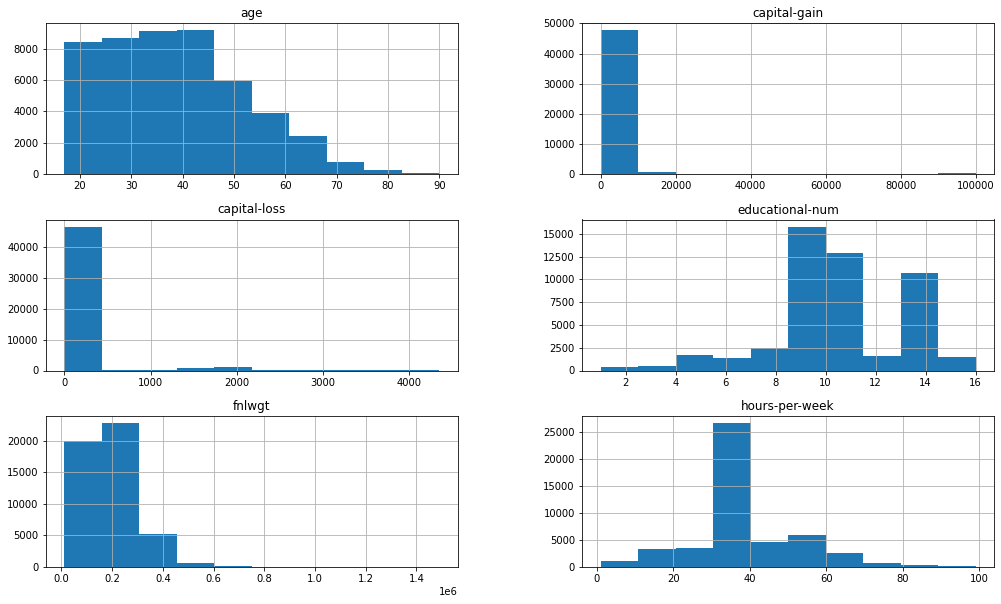

In [23]:
#Observamos el comportamiento de las variables númericas.
df.hist(figsize=(17, 10))
plt.show()

In [24]:
# Estadistica descriptiva rápida de las variables númericas
df.describe()

,age,capital-gain,capital-loss,hours-per-week,educational-num,fnlwgt
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,4.884200e+04
mean,38.643585,1079.067626,87.502314,40.422382,10.078089,1.896641e+05
std,13.710510,7452.019058,403.004552,12.391444,2.570973,1.056040e+05
min,17.000000,0.000000,0.000000,1.000000,1.000000,1.228500e+04
25%,28.000000,0.000000,0.000000,40.000000,9.000000,1.175505e+05
50%,37.000000,0.000000,0.000000,40.000000,10.000000,1.781445e+05
75%,48.000000,0.000000,0.000000,45.000000,12.000000,2.376420e+05
max,90.000000,99999.000000,4356.000000,99.000000,16.000000,1.490400e+06


Algunas observaciones sobre las variables cuantitativas.

•	La variable edad tiene un rango amplio con un mínimo de 17 años y un máximo de 90. Aunque se puede apreciar que la mayoría está entre los 20 y los 60. La edad promedio es de 38 años

•	Para el capital ganado y perdido se puede destacar grandes desviaciones estándar, la medía de capital-gain es 1079 y de capital-loss 87, pero para ambos la mediana es cero, lo que indicaría alta simetría. En el histograma puede apreciarse que para ambas variables en la mayoría de los casos el valor es cero. Dado esto pueden ser buenas candidatas para convertirse en una sola variable, reemplazándolas por el total (total=gain-loss) ya que podría brindar la misma información.

•	Para la variable de horas trabajadas por semana se destaca que el 75% de las personas trabaja 45 horas por semana o menos.

•	Para el caso de años estudiados puede apreciarse que la media y la mediana son iguales 10 años, al ver la desviación de 2.5 años y el histograma podemos apreciar que en efecto la mayoría de las personas parecen tener entre 7.5 y 12.5 años de estudio




In [25]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


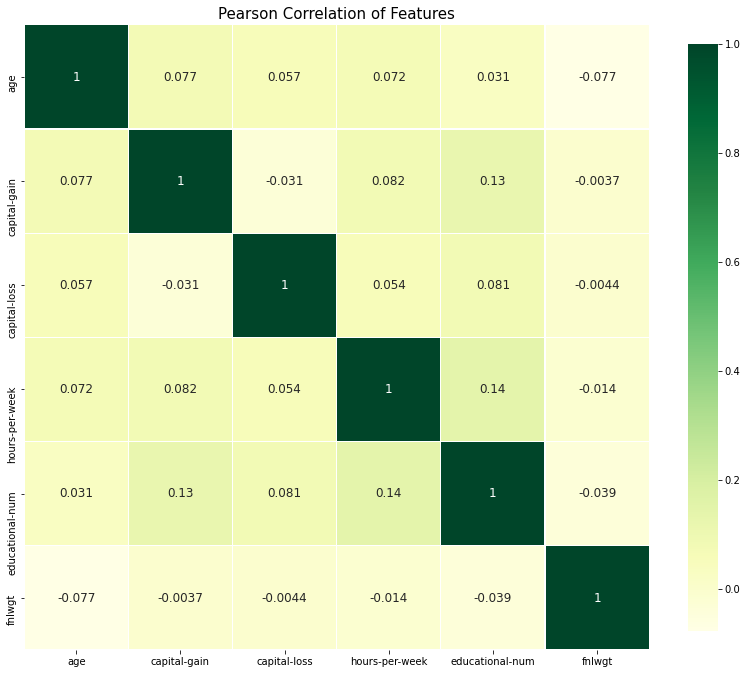

In [26]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = "YlGn",
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(df2)

No se aprecian correlaciones entre las variables númericas

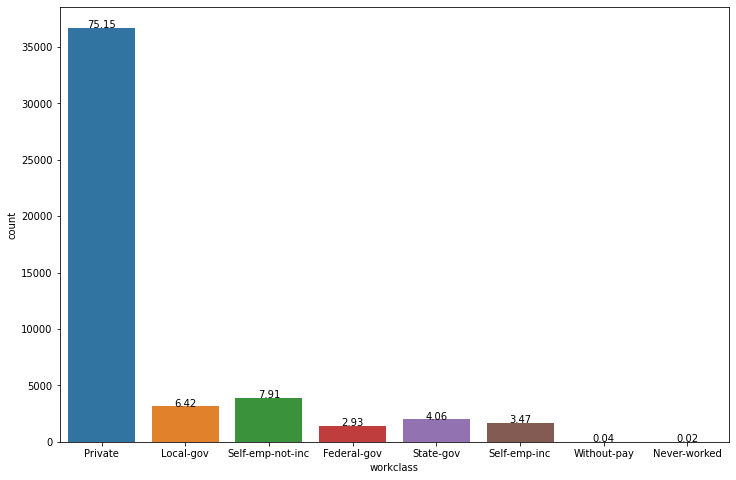

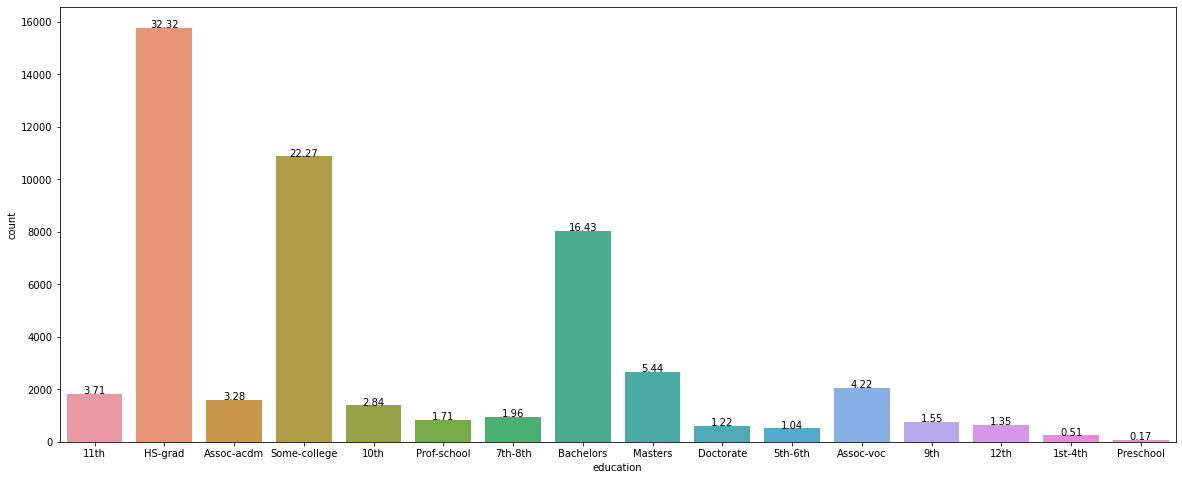

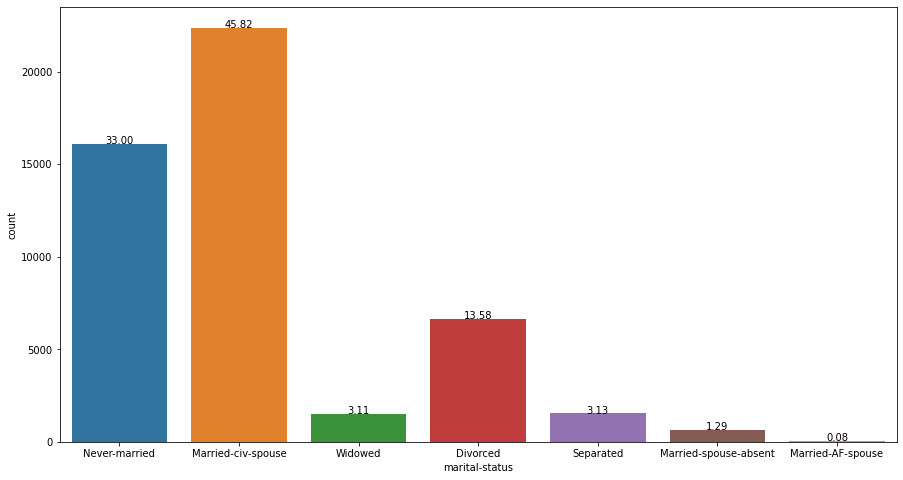

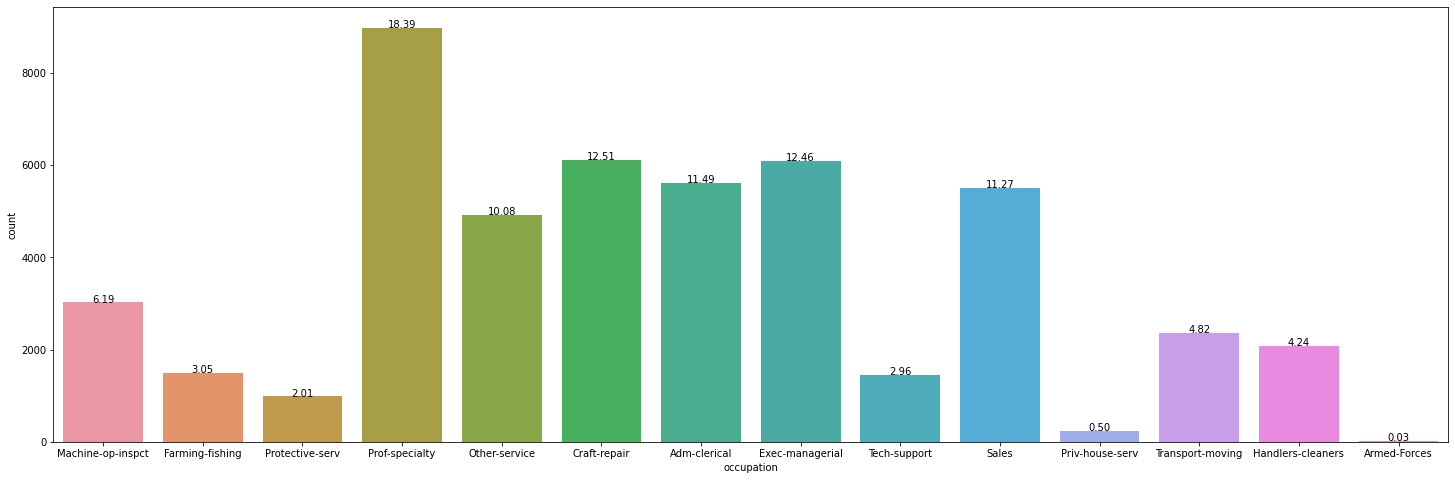

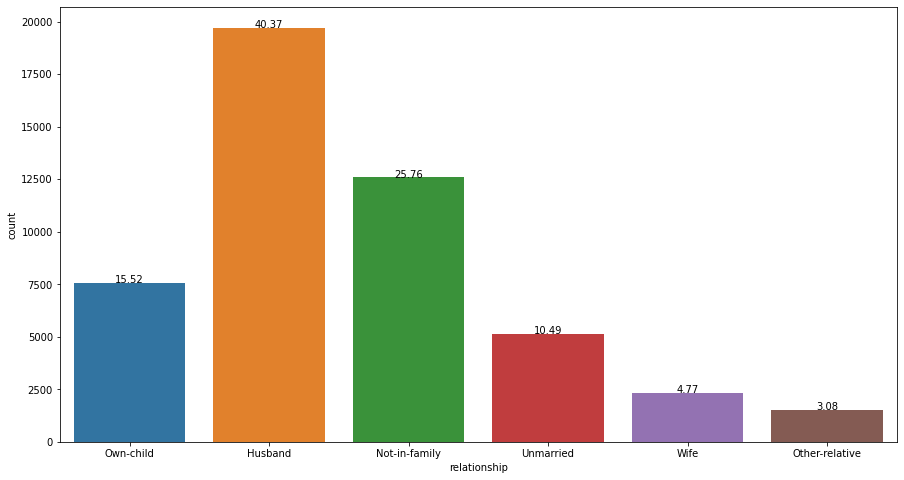

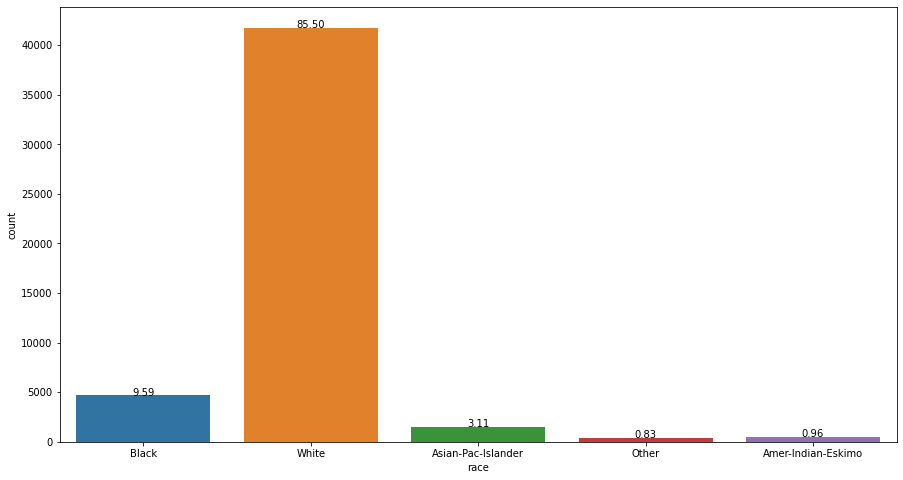

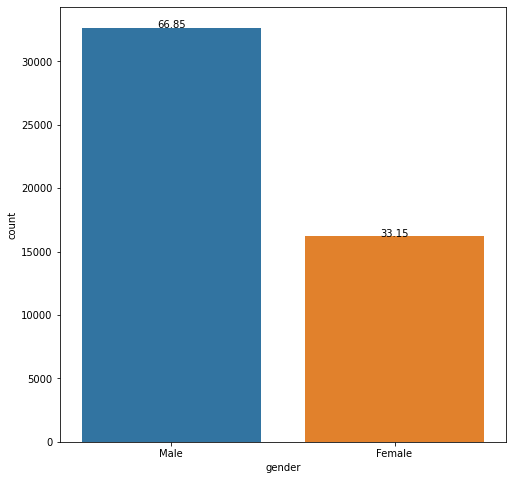

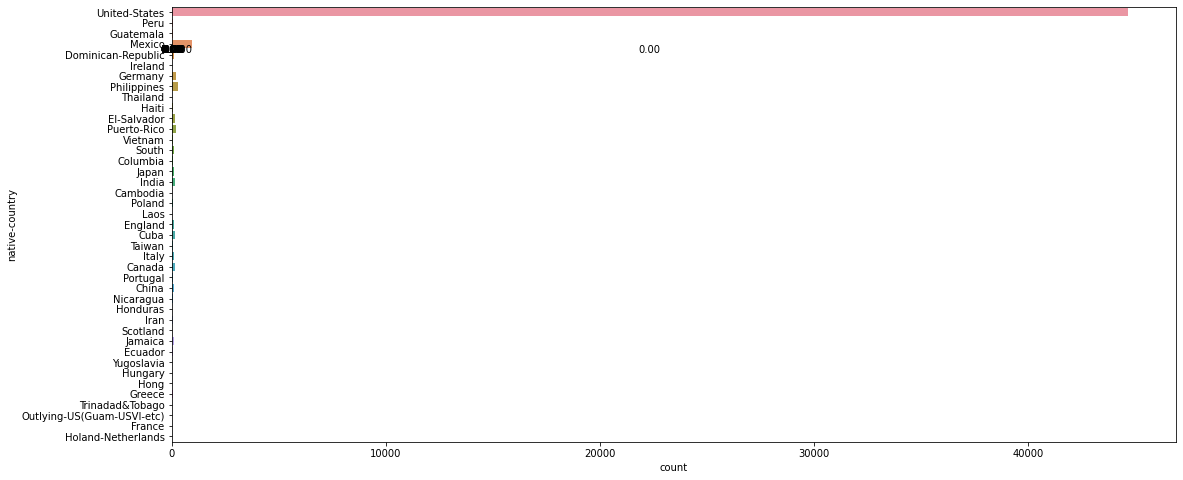

In [27]:
#Graficos de barras de variables cualitativas
plt.figure(figsize=(12,8))
total = float(len(df2["income"]) )
ax = sns.countplot(x="workclass", data=df2)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
    
plt.figure(figsize=(20,8))
#total = float(len(df2["income"]) )
ax1 = sns.countplot(x="education", data=df2)
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
    
plt.figure(figsize=(15,8))
#total = float(len(df2) )
ax2 = sns.countplot(x="marital-status", data=df2)
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 

plt.figure(figsize=(25,8))
ax3 = sns.countplot(x="occupation", data=df2)
for p in ax3.patches:
    height = p.get_height()
    ax3.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
    
plt.figure(figsize=(15,8))
ax4 = sns.countplot(x="relationship", data=df2)
for p in ax4.patches:
    height = p.get_height()
    ax4.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 

plt.figure(figsize=(15,8))
ax5 = sns.countplot(x="race", data=df2)
for p in ax5.patches:
    height = p.get_height()
    ax5.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
    
plt.figure(figsize=(8,8))
ax6 = sns.countplot(x="gender", data=df2)
for p in ax6.patches:
    height = p.get_height()
    ax6.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 

plt.figure(figsize=(18,8))
ax7 = sns.countplot(y="native-country", data=df2)
for p in ax7.patches:
    height = p.get_height()
    ax7.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 

plt.show()

In [28]:
#Tabla resumen de las variables cualitativas
df2.describe(include=["O"])

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,48842,48842,48842,48842,48842,48842,48842,48842,48842
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,36705,15784,22379,8981,19716,41762,32650,44689,37155


Algunas observaciones sobre las variables cualitativas

•	Puede apreciarse que para algunas variables existen muchas categorías, y con los diagramas de barras del notebook pudo identificarse que algunas cuentan con muy pocos datos.

•	Con respecto a la clase de trabajo, se puede destacar que más de la mitad de las personas encuestadas en este dataset pertenecen al sector privado

•	Hay 16 tipos de niveles educativos en el dataset y la moda representa el 32.3%

•	Del estado marital el 46% de las personas indican estar casadas

•	Hay 14 categorías para ocupación, la más representativa Pro-speciality equivale al 20% del total, lo que implica que no hay un peso absoluto de la moda

•	De raza y genero puede destacarse que más de la mitad son hombres blancos

•	El 92% de las personas de este dataset tiene como país de origen Estados Unidos, lo que no es de extrañar dado que este censo es en ese país.


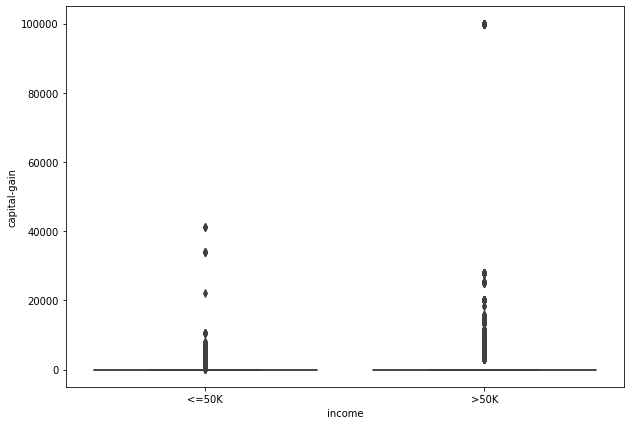

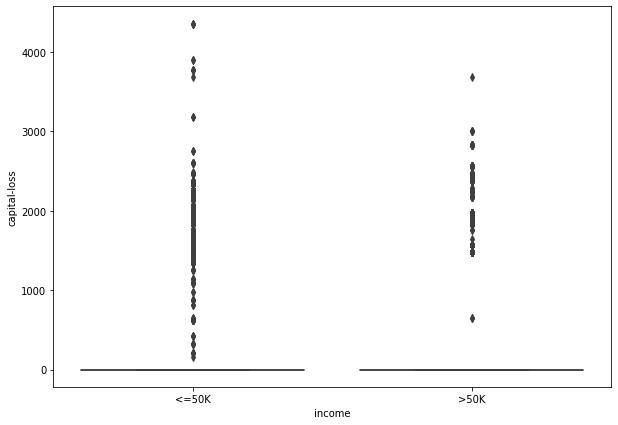

In [29]:
#Zoom en capital gain and capital loss
plt.figure(figsize=(10,7))
sns.boxplot(x="income", y="capital-gain", data=df2)
#plt.show()

plt.figure(figsize=(10,7))
sns.boxplot(x="income", y="capital-loss", data=df2)
plt.show()

Para la mayoria de las personas el capital ganado y el perdido es cero en ambos grupos de income

In [30]:
#Convirtiendo las variables capital gain y loss en una sola--> capital total
df2["capital_total"] = df2["capital-gain"] - df2["capital-loss"]
df2["capital_total"].describe()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


count    48842.000000
mean       991.565313
std       7475.549906
min      -4356.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital_total, dtype: float64

In [31]:
df2.drop('capital-gain', axis=1, inplace=True)
df2.drop('capital-loss', axis=1, inplace=True)
df2=df2[['age', 'hours-per-week', 'educational-num', 'capital_total', 'fnlwgt', 'workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']]
df2

,age,hours-per-week,educational-num,capital_total,fnlwgt,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
0,25,40,7,0,226802,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,38,50,9,0,89814,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,28,40,12,0,336951,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K
3,44,40,10,7688,160323,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
4,18,30,10,0,103497,Private,Some-college,Never-married,Prof-specialty,Own-child,White,Female,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,38,12,0,257302,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
48838,40,40,9,0,154374,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
48839,58,40,9,0,151910,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
48840,22,20,9,0,201490,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


# **Codificación One-Hot y Estandarización**

Vamos a dumizar las variables categóricas (One Hot Encoding) y estandarizar las númericas, para esto separamos la variable respuesta de las variables de entrada

In [32]:
X = df2.drop(['income'], axis=1)
y = df2['income']

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

Estandarización de variables númericas restando por su media y dividiendo por su desviación estandar

In [34]:
#X_num=X.iloc[:,0:4]
X_num=X.iloc[:,0:5]
X_num=scaler.fit_transform(X_num)
#columns=X.columns[0:4]
columns=X.columns[0:5]
X_num=pd.DataFrame(data=X_num,columns=columns)
X_num

,age,hours-per-week,educational-num,capital_total,fnlwgt
0,-0.995129,-0.034087,-1.197259,-0.132642,0.351675
1,-0.046942,0.772930,-0.419335,-0.132642,-0.945524
2,-0.776316,-0.034087,0.747550,-0.132642,1.394723
3,0.390683,-0.034087,-0.030373,0.895787,-0.277844
4,-1.505691,-0.841104,-0.030373,-0.132642,-0.815954
...,...,...,...,...,...
48837,-0.849254,-0.195490,0.747550,-0.132642,0.640492
48838,0.098933,-0.034087,-0.419335,-0.132642,-0.334178
48839,1.411808,-0.034087,-0.419335,-0.132642,-0.357510
48840,-1.213941,-1.648120,-0.419335,-0.132642,0.111984


In [35]:
#X=pd.concat([X_num,X.iloc[:,4:12]], axis= 1)
X=pd.concat([X_num,X.iloc[:,5:14]], axis= 1)
X

,age,hours-per-week,educational-num,capital_total,fnlwgt,workclass,education,marital-status,occupation,relationship,race,gender,native-country
0,-0.995129,-0.034087,-1.197259,-0.132642,0.351675,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States
1,-0.046942,0.772930,-0.419335,-0.132642,-0.945524,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States
2,-0.776316,-0.034087,0.747550,-0.132642,1.394723,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States
3,0.390683,-0.034087,-0.030373,0.895787,-0.277844,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States
4,-1.505691,-0.841104,-0.030373,-0.132642,-0.815954,Private,Some-college,Never-married,Prof-specialty,Own-child,White,Female,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,-0.849254,-0.195490,0.747550,-0.132642,0.640492,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States
48838,0.098933,-0.034087,-0.419335,-0.132642,-0.334178,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States
48839,1.411808,-0.034087,-0.419335,-0.132642,-0.357510,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States
48840,-1.213941,-1.648120,-0.419335,-0.132642,0.111984,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States


In [36]:
pip install category_encoders

     |████████████████████████████████| 81kB 2.1MB/s 


One Hot Encoding

In [37]:
# import category encoders
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder

In [38]:
#Dumización de las Variables categoricas.
# encode remaining variables with one-hot encoding
encoder = ce.OneHotEncoder(cols=['workclass','education','marital-status','occupation','relationship','race','gender','native-country'])
X = encoder.fit_transform(X)

In [39]:
X.head()

,age,hours-per-week,educational-num,capital_total,fnlwgt,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,education_1,education_2,education_3,education_4,education_5,education_6,education_7,education_8,education_9,education_10,education_11,education_12,education_13,education_14,education_15,education_16,marital-status_1,marital-status_2,marital-status_3,marital-status_4,marital-status_5,marital-status_6,marital-status_7,occupation_1,occupation_2,occupation_3,occupation_4,...,native-country_2,native-country_3,native-country_4,native-country_5,native-country_6,native-country_7,native-country_8,native-country_9,native-country_10,native-country_11,native-country_12,native-country_13,native-country_14,native-country_15,native-country_16,native-country_17,native-country_18,native-country_19,native-country_20,native-country_21,native-country_22,native-country_23,native-country_24,native-country_25,native-country_26,native-country_27,native-country_28,native-country_29,native-country_30,native-country_31,native-country_32,native-country_33,native-country_34,native-country_35,native-country_36,native-country_37,native-country_38,native-country_39,native-country_40,native-country_41
0,-0.995129,-0.034087,-1.197259,-0.132642,0.351675,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,-0.046942,0.772930,-0.419335,-0.132642,-0.945524,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-0.776316,-0.034087,0.747550,-0.132642,1.394723,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.390683,-0.034087,-0.030373,0.895787,-0.277844,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,-1.505691,-0.841104,-0.030373,-0.132642,-0.815954,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [40]:
X.shape

(48842, 104)

In [41]:
#df2['workclass'].unique()
X['workclass_1'].unique()

array([1, 0])

# **Identificación de Outliers**

In [42]:
#Nuevamente se unifican los X y Y para la identificación de los outliers
y_df = pd.DataFrame(y)
y_df['income'].replace('<=50K', 0, inplace=True)
y_df['income'].replace('>50K', 1, inplace=True)

In [43]:
X['income'] = y_df

In [44]:
X.shape

(48842, 105)

In [45]:
#Identificación de outliers a traves de las medianas y la distacia de Gower
#Las posiciones de datos numéricos: 
# Medianas
varMed = X.iloc[:,0:5].median()
varMed1 = pd.DataFrame(varMed)
varMed2 = varMed1.T
varMed2

,age,hours-per-week,educational-num,capital_total,fnlwgt
0,-0.119879,-0.034087,-0.030373,-0.132642,-0.109084


In [46]:
#Las posiciones de datos object
#Modas
varMod =  X.iloc[:,5:105].mode()
varMod

,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,education_1,education_2,education_3,education_4,education_5,education_6,education_7,education_8,education_9,education_10,education_11,education_12,education_13,education_14,education_15,education_16,marital-status_1,marital-status_2,marital-status_3,marital-status_4,marital-status_5,marital-status_6,marital-status_7,occupation_1,occupation_2,occupation_3,occupation_4,occupation_5,occupation_6,occupation_7,occupation_8,occupation_9,...,native-country_3,native-country_4,native-country_5,native-country_6,native-country_7,native-country_8,native-country_9,native-country_10,native-country_11,native-country_12,native-country_13,native-country_14,native-country_15,native-country_16,native-country_17,native-country_18,native-country_19,native-country_20,native-country_21,native-country_22,native-country_23,native-country_24,native-country_25,native-country_26,native-country_27,native-country_28,native-country_29,native-country_30,native-country_31,native-country_32,native-country_33,native-country_34,native-country_35,native-country_36,native-country_37,native-country_38,native-country_39,native-country_40,native-country_41,income
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [47]:
#Juntar en un solo vector:
vecCentroSD = pd.concat([varMed2,varMod], axis= 1)
vecCentroSD

,age,hours-per-week,educational-num,capital_total,fnlwgt,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,education_1,education_2,education_3,education_4,education_5,education_6,education_7,education_8,education_9,education_10,education_11,education_12,education_13,education_14,education_15,education_16,marital-status_1,marital-status_2,marital-status_3,marital-status_4,marital-status_5,marital-status_6,marital-status_7,occupation_1,occupation_2,occupation_3,occupation_4,...,native-country_3,native-country_4,native-country_5,native-country_6,native-country_7,native-country_8,native-country_9,native-country_10,native-country_11,native-country_12,native-country_13,native-country_14,native-country_15,native-country_16,native-country_17,native-country_18,native-country_19,native-country_20,native-country_21,native-country_22,native-country_23,native-country_24,native-country_25,native-country_26,native-country_27,native-country_28,native-country_29,native-country_30,native-country_31,native-country_32,native-country_33,native-country_34,native-country_35,native-country_36,native-country_37,native-country_38,native-country_39,native-country_40,native-country_41,income
0,-0.119879,-0.034087,-0.030373,-0.132642,-0.109084,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [48]:
#distancia de gower vectorCentro a todos
mSD = gower.gower_topn(vecCentroSD, X, n = len(X))
ordenSD = mSD['index']
valoresSD = mSD['values']

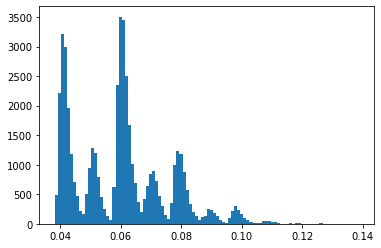

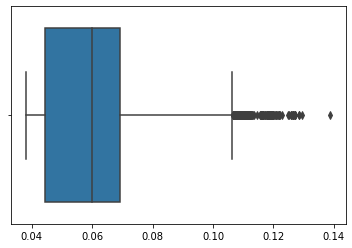

In [49]:
#Gráfica
plt.hist(valoresSD, bins = 100)
plt.show()
ax = sns.boxplot(x=valoresSD)

In [50]:
dfvalSD = pd.DataFrame(valoresSD)
d = dfvalSD.describe().T
d

,count,mean,std,min,25%,50%,75%,max
0,48842.0,0.059775,0.015583,0.038107,0.044339,0.059897,0.069244,0.138798


In [51]:
#Bigotes
riq = (d['75%'].values - d['25%'].values)*1.5
bd  = riq + d['75%'].values
bi  = d['25%'].values - riq

In [52]:
#Se crea un DataFrame para el manejo de los valores e indices de las distancias de gower
oul = pd.DataFrame()
oul['index'] = mSD['index']
oul['values'] = mSD['values']
oul

,index,values
0,8546,0.038107
1,43616,0.038130
2,782,0.038151
3,36256,0.038157
4,14112,0.038194
...,...,...
48837,35308,0.127256
48838,30682,0.128486
48839,2699,0.128499
48840,31318,0.129460


In [53]:
# Se identifican los outliers
array2 = []
for index, row in oul.iterrows():
  if row['values'] > bd[0]:
    array2.append(True)
  else:
    array2.append(False)
oul['outlier'] = array2
oul

,index,values,outlier
0,8546,0.038107,False
1,43616,0.038130,False
2,782,0.038151,False
3,36256,0.038157,False
4,14112,0.038194,False
...,...,...,...
48837,35308,0.127256,True
48838,30682,0.128486,True
48839,2699,0.128499,True
48840,31318,0.129460,True


In [54]:
# Se filtran los outliers
oul = oul[oul.outlier > False]
oul

,index,values,outlier
48548,1931,0.106619,True
48549,28118,0.106640,True
48550,42901,0.106658,True
48551,29069,0.106675,True
48552,27235,0.106685,True
...,...,...,...
48837,35308,0.127256,True
48838,30682,0.128486,True
48839,2699,0.128499,True
48840,31318,0.129460,True


In [55]:
# Se eliminan del DataFrame Inicial los outliers
X = X.drop(oul.index)

In [56]:
X

,age,hours-per-week,educational-num,capital_total,fnlwgt,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,education_1,education_2,education_3,education_4,education_5,education_6,education_7,education_8,education_9,education_10,education_11,education_12,education_13,education_14,education_15,education_16,marital-status_1,marital-status_2,marital-status_3,marital-status_4,marital-status_5,marital-status_6,marital-status_7,occupation_1,occupation_2,occupation_3,occupation_4,...,native-country_3,native-country_4,native-country_5,native-country_6,native-country_7,native-country_8,native-country_9,native-country_10,native-country_11,native-country_12,native-country_13,native-country_14,native-country_15,native-country_16,native-country_17,native-country_18,native-country_19,native-country_20,native-country_21,native-country_22,native-country_23,native-country_24,native-country_25,native-country_26,native-country_27,native-country_28,native-country_29,native-country_30,native-country_31,native-country_32,native-country_33,native-country_34,native-country_35,native-country_36,native-country_37,native-country_38,native-country_39,native-country_40,native-country_41,income
0,-0.995129,-0.034087,-1.197259,-0.132642,0.351675,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,-0.046942,0.772930,-0.419335,-0.132642,-0.945524,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-0.776316,-0.034087,0.747550,-0.132642,1.394723,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0.390683,-0.034087,-0.030373,0.895787,-0.277844,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,-1.505691,-0.841104,-0.030373,-0.132642,-0.815954,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48543,1.703558,-1.970927,-0.030373,-0.132642,-0.281774,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
48544,-0.849254,-0.034087,-0.419335,-0.132642,-0.122185,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
48545,-0.484566,-0.841104,-1.197259,-0.405802,0.675075,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
48546,-0.119879,-0.034087,1.136512,-0.132642,-0.088275,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [57]:
#Nuevamente partimos las variables de entrada de la variable resultado
y = X['income']
X = X.drop(['income'], axis=1)

# **Selección de caracteristicas**

Para la selección de características se probaran 4 estrategías. Una de filtro, una de envoltorio y 2 de integrado

In [58]:
pip install featuretools

     |████████████████████████████████| 286kB 2.8MB/s 
     |████████████████████████████████| 655kB 8.8MB/s 
     |████████████████████████████████| 92kB 7.9MB/s 
     |████████████████████████████████| 102kB 7.5MB/s 
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=13610784b996d888c4484bed64505d794a24a08013cc490600078ef176b03442
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
  Created wheel for locket: filename=locket-0.2.0-cp36-none-any.whl size=4040 sha256=62aab4688c1823c9cd5fa130c72524c697ffa09006655c7073b386ed0b92a366
  Stored in directory: /root/.cache/pip/wheels/26/1e/e8/4fa236ec931b1a0cdd61578e20d4934d7bf188858723b84698
Successfully built contextvars locket
ERROR: distributed 2.27.0 has requirement cloudpickle>=1.5.0, but you'll have cloudpickle 1.3.0 which is incompatible.
  Found existing installation: distributed 1.25.3
    Uninstalling distributed-1.25.3:
      Successfu

In [59]:
import featuretools as ft
from featuretools.primitives import *
from featuretools.variable_types import Numeric
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


##Análisis estadístico univariante para selección de características (Método de Filtro)#

In [60]:
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

Correlación de Kendall para revisar significancia de variable númericas con respecto a variable respuesta

In [61]:
#Se unifican X_res, y_res
df_X_res = X.copy(deep=True)
df_X_res=X.iloc[:,0:5]
#df_X_res["income"] = y_res
df_X_res

,age,hours-per-week,educational-num,capital_total,fnlwgt
0,-0.995129,-0.034087,-1.197259,-0.132642,0.351675
1,-0.046942,0.772930,-0.419335,-0.132642,-0.945524
2,-0.776316,-0.034087,0.747550,-0.132642,1.394723
3,0.390683,-0.034087,-0.030373,0.895787,-0.277844
4,-1.505691,-0.841104,-0.030373,-0.132642,-0.815954
...,...,...,...,...,...
48543,1.703558,-1.970927,-0.030373,-0.132642,-0.281774
48544,-0.849254,-0.034087,-0.419335,-0.132642,-0.122185
48545,-0.484566,-0.841104,-1.197259,-0.405802,0.675075
48546,-0.119879,-0.034087,1.136512,-0.132642,-0.088275


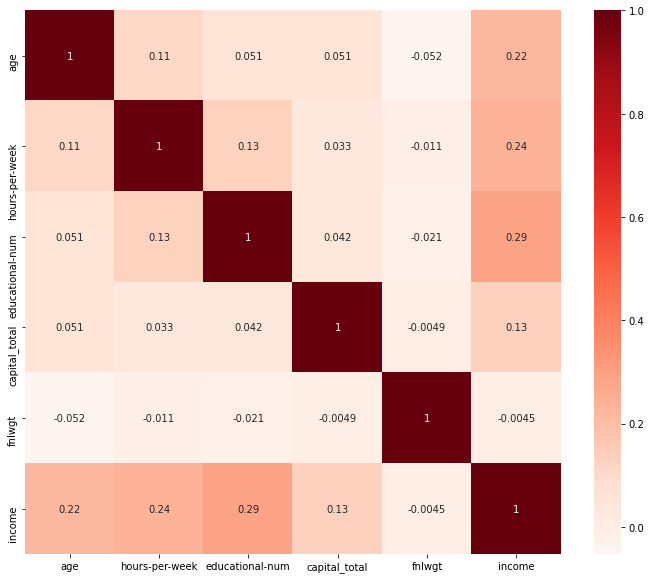

In [62]:
#Se unifican X_res, y_res
df_X_res = X.copy(deep=True)
df_X_res=df_X_res.iloc[:,0:5]
df_X_res["income"] = y
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df_X_res.corr(method='kendall')
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [63]:
tau, p_value = stats.kendalltau(df_X_res['age'],y)
tau1, p_value1 = stats.kendalltau(df_X_res['hours-per-week'],y)
tau2, p_value2 = stats.kendalltau(df_X_res['educational-num'],y)
tau3, p_value3 = stats.kendalltau(df_X_res['capital_total'],y)
tau4, p_value4 = stats.kendalltau(df_X_res['fnlwgt'],y)

In [64]:
corr_kendall=pd.DataFrame()
corr_kendall['Variable']=['age','hours-per-week','educational-num','capital_total','fnlwgt']
corr_kendall['Tau']=[tau,tau1,tau2,tau3,tau4]
corr_kendall['p_value']=[p_value,p_value1,p_value2,p_value3,p_value4]
corr_kendall

,Variable,Tau,p_value
0,age,0.222680,0.000000e+00
1,hours-per-week,0.237639,0.000000e+00
2,educational-num,0.289631,0.000000e+00
3,capital_total,0.133651,5.709543e-203
4,fnlwgt,-0.004497,2.249291e-01


Chi-cuadrado para revisar la significancia de las variables categoricas

In [65]:
from sklearn.feature_selection import SelectKBest, chi2
import matplotlib.pyplot as plt

In [66]:
df_X_res = None
df_X_res = X.copy(deep=True)
df_X_res=df_X_res.iloc[:,5:104]

In [67]:
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(df_X_res, y)
X_train_fs = fs.transform(df_X_res)
#X_test_fs = fs.transform(X_test)

In [68]:
# what are scores for the features
df_fs_Xch=pd.DataFrame()
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 189.313120
Feature 1: 53.104212
Feature 2: 31.943549
Feature 3: 183.903930
Feature 4: 8.982561
Feature 5: 906.196787
Feature 6: 2.398263
Feature 7: 2.518755
Feature 8: 351.209571
Feature 9: 559.170129
Feature 10: 2.958410
Feature 11: 150.004528
Feature 12: 235.819385
Feature 13: 1140.777754
Feature 14: 157.114435
Feature 15: 1322.838710
Feature 16: 1387.794244
Feature 17: 762.160272
Feature 18: 96.519883
Feature 19: 2.510326
Feature 20: 140.623261
Feature 21: 97.602488
Feature 22: 57.224791
Feature 23: 22.940498
Feature 24: 3309.820678
Feature 25: 5231.585640
Feature 26: 199.268856
Feature 27: 689.450938
Feature 28: 253.630523
Feature 29: 74.354475
Feature 30: 3.921146
Feature 31: 220.617494
Feature 32: 123.996284
Feature 33: 29.264681
Feature 34: 495.354311
Feature 35: 1052.036201
Feature 36: 5.879873
Feature 37: 320.312042
Feature 38: 1883.351705
Feature 39: 21.136942
Feature 40: 24.798199
Feature 41: 68.507491
Feature 42: 15.902522
Feature 43: 339.213447
Feature 44: 1.064

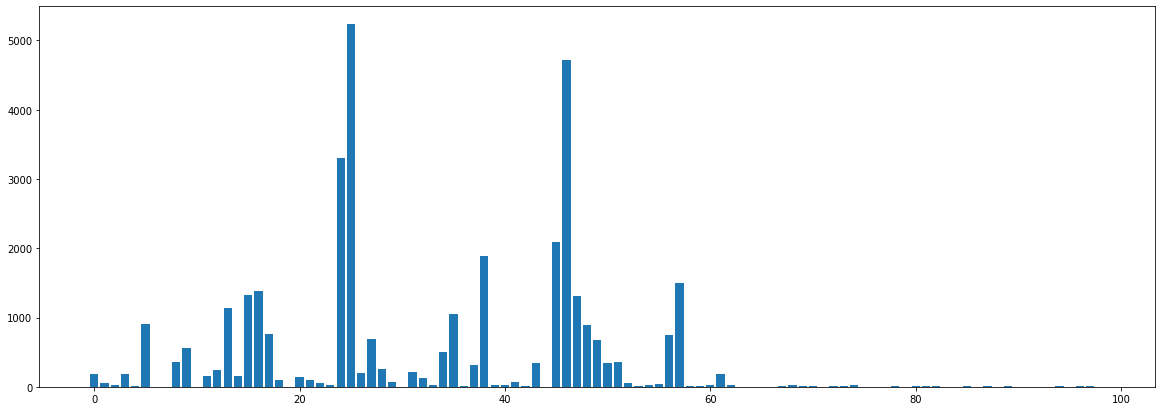

In [69]:
# plot the scores
plt.figure(figsize=(20,7))
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [70]:
df_fs_Xch['Puntaje']=fs.scores_
df_fs_Xch['Valor p']=fs.pvalues_
df_fs_Xch=df_fs_Xch.sort_values('Puntaje',ascending=False)
#fs_200 =df_fs_Xch['Puntaje']>=100
fs_200 =df_fs_Xch['Valor p']<0.05
df_fs_Xch=df_fs_Xch[fs_200]
#df_fs_Xch.head(60)

In [71]:
df_fs_Xch

,Puntaje,Valor p
25,5231.585640,0.000000
46,4723.297978,0.000000
24,3309.820678,0.000000
45,2095.041277,0.000000
38,1883.351705,0.000000
...,...,...
96,4.850472,0.027639
81,4.646884,0.031110
94,4.400923,0.035919
95,4.054905,0.044043


In [72]:
#cols=df_fs_Xch.index.to_list()
print(df_fs_Xch.index)
print(X.columns.values.tolist())

Int64Index([25, 46, 24, 45, 38, 57, 16, 15, 47, 13, 35,  5, 48, 17, 56, 27, 49,
             9, 34, 51,  8, 50, 43, 37, 28, 12, 31, 26,  0, 61,  3, 14, 11, 20,
            32, 21, 18, 29, 41, 22,  1, 52, 55,  2, 54, 33, 40, 74, 68, 23, 39,
            60, 62, 69, 72, 42, 78, 70, 82, 80,  4, 85, 53, 97, 58, 36, 67, 59,
            87, 89, 73, 96, 81, 94, 95, 30],
           dtype='int64')
['age', 'hours-per-week', 'educational-num', 'capital_total', 'fnlwgt', 'workclass_1', 'workclass_2', 'workclass_3', 'workclass_4', 'workclass_5', 'workclass_6', 'workclass_7', 'workclass_8', 'education_1', 'education_2', 'education_3', 'education_4', 'education_5', 'education_6', 'education_7', 'education_8', 'education_9', 'education_10', 'education_11', 'education_12', 'education_13', 'education_14', 'education_15', 'education_16', 'marital-status_1', 'marital-status_2', 'marital-status_3', 'marital-status_4', 'marital-status_5', 'marital-status_6', 'marital-status_7', 'occupation_1', 'occupation_2'

In [73]:
column=['workclass_1', 'workclass_2', 'workclass_3', 'workclass_4', 'workclass_5', 'workclass_6', 'education_1', 'education_2', 'education_4', 'education_5', 'education_6', 'education_7', 'education_8', 'education_9', 'education_10', 'education_11', 'education_13', 'education_14', 'education_15', 'education_16', 'marital-status_1', 'marital-status_2', 'marital-status_3', 'marital-status_4', 'marital-status_5', 'marital-status_6', 'marital-status_7', 'occupation_1', 'occupation_2', 'occupation_3', 'occupation_4', 'occupation_5', 'occupation_6', 'occupation_7', 'occupation_8', 'occupation_9', 'occupation_10', 'occupation_11', 'occupation_12', 'occupation_13', 'relationship_1', 'relationship_2', 'relationship_3', 'relationship_4', 'relationship_5', 'relationship_6', 'race_1', 'race_2', 'race_3', 'race_4', 'race_5', 'gender_1', 'gender_2', 'native-country_1', 'native-country_2', 'native-country_3', 'native-country_4', 'native-country_5', 'native-country_10', 'native-country_11', 'native-country_12', 'native-country_13', 'native-country_15', 'native-country_16', 'native-country_17', 'native-country_21', 'native-country_23', 'native-country_24', 'native-country_25', 'native-country_28', 'native-country_30', 'native-country_32', 'native-country_37', 'native-country_38', 'native-country_39', 'native-country_40']

In [74]:
#Dataset resultante del análisis estadístico
X_AS=pd.concat([X.iloc[:,0:4],X[column]],axis=1)
X_AS

,age,hours-per-week,educational-num,capital_total,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,education_1,education_2,education_4,education_5,education_6,education_7,education_8,education_9,education_10,education_11,education_13,education_14,education_15,education_16,marital-status_1,marital-status_2,marital-status_3,marital-status_4,marital-status_5,marital-status_6,marital-status_7,occupation_1,occupation_2,occupation_3,occupation_4,occupation_5,occupation_6,occupation_7,occupation_8,occupation_9,occupation_10,occupation_11,occupation_12,occupation_13,relationship_1,relationship_2,relationship_3,relationship_4,relationship_5,relationship_6,race_1,race_2,race_3,race_4,race_5,gender_1,gender_2,native-country_1,native-country_2,native-country_3,native-country_4,native-country_5,native-country_10,native-country_11,native-country_12,native-country_13,native-country_15,native-country_16,native-country_17,native-country_21,native-country_23,native-country_24,native-country_25,native-country_28,native-country_30,native-country_32,native-country_37,native-country_38,native-country_39,native-country_40
0,-0.995129,-0.034087,-1.197259,-0.132642,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,-0.046942,0.772930,-0.419335,-0.132642,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-0.776316,-0.034087,0.747550,-0.132642,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.390683,-0.034087,-0.030373,0.895787,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,-1.505691,-0.841104,-0.030373,-0.132642,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48543,1.703558,-1.970927,-0.030373,-0.132642,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
48544,-0.849254,-0.034087,-0.419335,-0.132642,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
48545,-0.484566,-0.841104,-1.197259,-0.405802,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
48546,-0.119879,-0.034087,1.136512,-0.132642,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [75]:
columns_AS=X_AS.columns

## **Recursive feature elimination (Método de envoltorio)**

In [76]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

In [77]:
df_X_res = None
df_X_res = pd.DataFrame(X)
df_y_res = None
df_y_res = pd.DataFrame(y)
#Usando RFE para elegir caracteristicas
rfe_selector = RFE(RandomForestRegressor(n_estimators=300), n_features_to_select=None, step=10, verbose=5)
rfe_selector.fit(X, y)
#rfe=rfe_selector.fit(X_res, y_res)

Fitting estimator with 104 features.
Fitting estimator with 94 features.
Fitting estimator with 84 features.
Fitting estimator with 74 features.
Fitting estimator with 64 features.
Fitting estimator with 54 features.


RFE(estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                    criterion='mse', max_depth=None,
                                    max_features='auto', max_leaf_nodes=None,
                                    max_samples=None, min_impurity_decrease=0.0,
                                    min_impurity_split=None, min_samples_leaf=1,
                                    min_samples_split=2,
                                    min_weight_fraction_leaf=0.0,
                                    n_estimators=300, n_jobs=None,
                                    oob_score=False, random_state=None,
                                    verbose=0, warm_start=False),
    n_features_to_select=None, step=10, verbose=5)

In [78]:
rfe_support = rfe_selector.get_support()

In [79]:
rfe_feature = X.loc[:,rfe_support].columns.tolist()

In [80]:
print(rfe_support)
print(rfe_feature)

[ True  True  True  True  True  True  True  True  True  True  True False
 False False  True  True  True False  True False  True  True False False
  True False False False False  True  True  True  True  True False False
  True  True  True  True  True  True  True  True  True  True False  True
  True False  True  True  True  True  True  True  True  True  True False
  True  True  True  True False False  True False False  True  True False
 False False False False False False False False False False False False
 False False False  True False False False False False False False False
 False False False False False False False False]
['age', 'hours-per-week', 'educational-num', 'capital_total', 'fnlwgt', 'workclass_1', 'workclass_2', 'workclass_3', 'workclass_4', 'workclass_5', 'workclass_6', 'education_2', 'education_3', 'education_4', 'education_6', 'education_8', 'education_9', 'education_12', 'marital-status_1', 'marital-status_2', 'marital-status_3', 'marital-status_4', 'marital-status_5'

In [81]:
#print(rfe.ranking_)

In [82]:
X_RFE=X.loc[:,rfe_support]
X_RFE

,age,hours-per-week,educational-num,capital_total,fnlwgt,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,education_2,education_3,education_4,education_6,education_8,education_9,education_12,marital-status_1,marital-status_2,marital-status_3,marital-status_4,marital-status_5,occupation_1,occupation_2,occupation_3,occupation_4,occupation_5,occupation_6,occupation_7,occupation_8,occupation_9,occupation_10,occupation_12,occupation_13,relationship_1,relationship_2,relationship_3,relationship_4,relationship_5,relationship_6,race_1,race_2,race_3,race_5,gender_1,gender_2,native-country_1,native-country_4,native-country_7,native-country_8,native-country_25
0,-0.995129,-0.034087,-1.197259,-0.132642,0.351675,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
1,-0.046942,0.772930,-0.419335,-0.132642,-0.945524,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0
2,-0.776316,-0.034087,0.747550,-0.132642,1.394723,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0
3,0.390683,-0.034087,-0.030373,0.895787,-0.277844,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
4,-1.505691,-0.841104,-0.030373,-0.132642,-0.815954,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48543,1.703558,-1.970927,-0.030373,-0.132642,-0.281774,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0
48544,-0.849254,-0.034087,-0.419335,-0.132642,-0.122185,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
48545,-0.484566,-0.841104,-1.197259,-0.405802,0.675075,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0
48546,-0.119879,-0.034087,1.136512,-0.132642,-0.088275,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0


In [83]:
columns_RFE=X_RFE.columns

## Support Vector Machine (Método Integrado)

In [84]:
#  Configurar modelo svm
lsvc = LinearSVC(C=1,                              # Parámetro de regularización por defecto de la libreria
                 penalty="l1",                     # Regularizacion L1 para seleccion de caracteristicas 
                 max_iter = 20000,                         
                 dual=False).fit(X, y) 

# Configurar modelo de selección de variables

model = SelectFromModel(lsvc, prefit=True)        # Meta-transformador para seleccionar características basadas en pesos de importancia.
X_new = model.transform(X)
#X_selected_df = pd.DataFrame(X_new, columns=[X_res.columns[i] for i in range(len(X_res.columns)) if model.get_support()[i]])
X_lsvc = pd.DataFrame(X_new, columns=[X.columns[i] for i in range(len(X.columns)) if model.get_support()[i]])
print('Hay %d variables para tener en cuenta.' % X_lsvc.shape[1])

Hay 94 variables para tener en cuenta.


In [85]:
# Imprime el valor de los coeficientes
lsvc.coef_ 

array([[ 0.10696726,  0.13216891,  0.25346683,  0.60318128,  0.02723387,
         0.        , -0.01613502, -0.17087855,  0.18656165, -0.08575381,
         0.09325417, -0.28646312,  0.        , -0.08921575, -0.06013497,
        -0.12245831, -0.00707967, -0.0589919 ,  0.16725508,  0.02780939,
        -0.01375888,  0.03187278,  0.07871027,  0.23064757, -0.06056257,
         0.        , -0.08255431,  0.23109766, -0.19337157, -0.51188939,
         0.15635789, -0.35934261, -0.40050525, -0.38165256, -0.37444802,
         0.10649822, -0.15016539, -0.38185837,  0.09818297,  0.0454643 ,
        -0.29855109, -0.03106913, -0.01142063,  0.22789772,  0.14969262,
         0.05857847, -0.4914611 , -0.09336156, -0.26489953,  0.05467609,
        -0.15446808,  0.03611131, -0.00239511, -0.0208893 ,  0.36921128,
        -0.15960061, -0.07887681,  0.        ,  0.03744462, -0.02088497,
        -0.17926351, -0.2278031 , -0.42692925,  0.06570586, -0.24849523,
        -0.01219737, -0.17664174, -0.36407096,  0.3

In [86]:
# Observemos que variables quedaron
X_lsvc.head(3)

,age,hours-per-week,educational-num,capital_total,fnlwgt,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,education_3,education_4,education_5,education_6,education_7,education_8,education_9,education_10,education_11,education_12,education_14,education_15,education_16,marital-status_1,marital-status_2,marital-status_3,marital-status_4,marital-status_5,marital-status_6,marital-status_7,occupation_1,occupation_2,occupation_3,occupation_4,occupation_5,occupation_6,occupation_7,...,race_3,race_4,race_5,gender_1,gender_2,native-country_1,native-country_2,native-country_3,native-country_4,native-country_5,native-country_6,native-country_7,native-country_8,native-country_9,native-country_10,native-country_11,native-country_12,native-country_13,native-country_14,native-country_15,native-country_17,native-country_18,native-country_19,native-country_20,native-country_21,native-country_22,native-country_24,native-country_25,native-country_26,native-country_27,native-country_28,native-country_31,native-country_32,native-country_33,native-country_34,native-country_35,native-country_36,native-country_38,native-country_39,native-country_40
0,-0.995129,-0.034087,-1.197259,-0.132642,0.351675,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.046942,0.772930,-0.419335,-0.132642,-0.945524,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.776316,-0.034087,0.747550,-0.132642,1.394723,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [87]:
columns_lsvc=X_lsvc.columns

## Estimación de regresión Lasso con penalización (Método Integrado)

Selección de características usando la regularización de Lasso. Si la característica es irrelevante, lasso penaliza su coeficiente y lo convierte en 0. Por lo tanto, las características con coeficiente = 0 se eliminan y el resto se toma.

In [88]:
df_X_res = None
df_X_res = pd.DataFrame(X)
df_y_res = None
df_y_res = pd.DataFrame(y)
reg = LassoCV() 
reg.fit (df_X_res, df_y_res) 
print ("Mejor alfa usando LassoCV integrado:% f"% reg.alpha_) 
print ("Mejor puntaje usando LassoCV integrado:% f"% reg.score (df_X_res, df_y_res)) 
coef = pd.Series (reg.coef_, index = df_X_res.columns)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mejor alfa usando LassoCV integrado: 0.000142
Mejor puntaje usando LassoCV integrado: 0.355353


In [89]:
print ("Lasso recogió " + str(sum(coef != 0)) + " variables y eliminó las otras " + str(sum(coef == 0)) + " variables")

Lasso recogió 52 variables y eliminó las otras 52 variables


In [90]:
coef

age                  0.033297
hours-per-week       0.038382
educational-num      0.081070
capital_total        0.053500
fnlwgt               0.008050
                       ...   
native-country_37    0.000000
native-country_38   -0.000000
native-country_39   -0.000000
native-country_40    0.000000
native-country_41    0.000000
Length: 104, dtype: float64

Text(0.5, 1.0, 'Feature importance using Lasso Model')

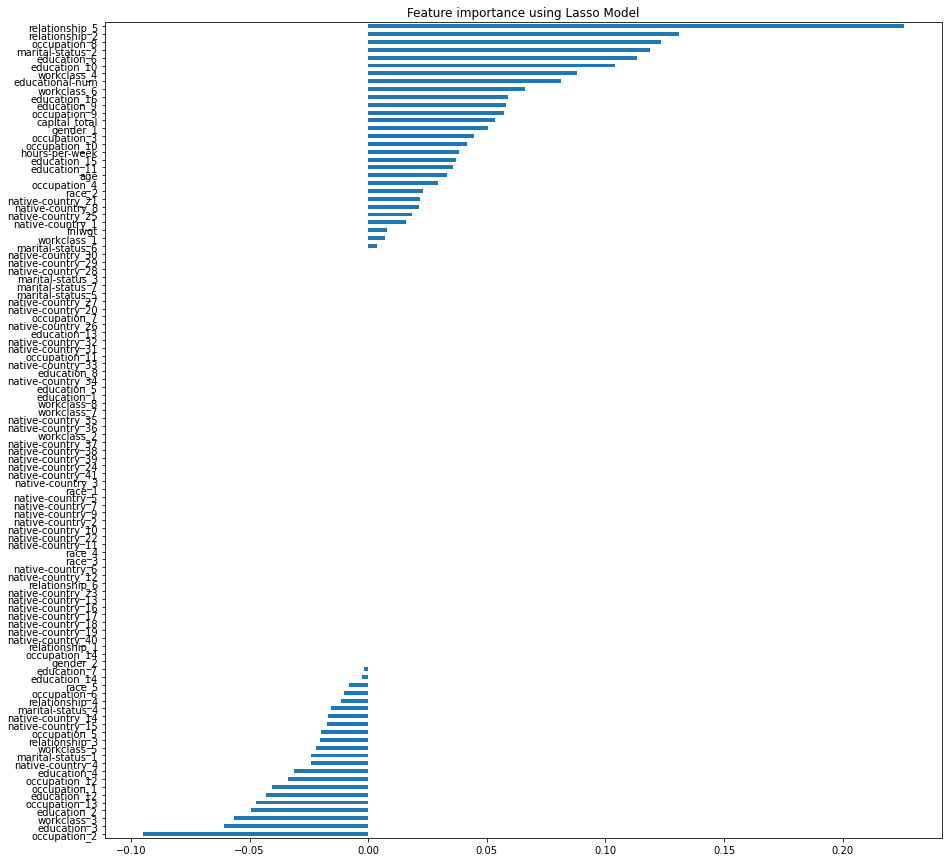

In [91]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (15.0, 15.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [92]:
model_3 = SelectFromModel(reg, prefit=True)        # Meta-transformador para seleccionar características basadas en pesos de importancia.
X_new_3 = model_3.transform(df_X_res)
#X_selected_df_3 = pd.DataFrame(X_new_3, columns=[df_X_res.columns[i] for i in range(len(df_X_res.columns)) if model_3.get_support()[i]])
X_lasso = pd.DataFrame(X_new_3, columns=[df_X_res.columns[i] for i in range(len(df_X_res.columns)) if model_3.get_support()[i]])

In [93]:
X_lasso

,age,hours-per-week,educational-num,capital_total,fnlwgt,workclass_1,workclass_3,workclass_4,workclass_5,workclass_6,education_2,education_3,education_4,education_6,education_7,education_9,education_10,education_11,education_12,education_14,education_15,education_16,marital-status_1,marital-status_2,marital-status_4,marital-status_6,occupation_1,occupation_2,occupation_3,occupation_4,occupation_5,occupation_6,occupation_8,occupation_9,occupation_10,occupation_12,occupation_13,relationship_2,relationship_3,relationship_4,relationship_5,race_2,race_5,gender_1,native-country_1,native-country_4,native-country_8,native-country_14,native-country_15,native-country_21,native-country_25
0,-0.995129,-0.034087,-1.197259,-0.132642,0.351675,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.046942,0.772930,-0.419335,-0.132642,-0.945524,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.776316,-0.034087,0.747550,-0.132642,1.394723,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.390683,-0.034087,-0.030373,0.895787,-0.277844,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.505691,-0.841104,-0.030373,-0.132642,-0.815954,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48543,1.703558,-1.970927,-0.030373,-0.132642,-0.281774,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
48544,-0.849254,-0.034087,-0.419335,-0.132642,-0.122185,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48545,-0.484566,-0.841104,-1.197259,-0.405802,0.675075,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
48546,-0.119879,-0.034087,1.136512,-0.132642,-0.088275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [94]:
columns_lasso=X_lasso.columns

# **Balanceo de Categorías**

In [95]:
#Asignando los nombres de nuevo a o y 1 pra crear el grafico
y_df_2 = pd.DataFrame(y)
y_df_2['income'].replace(0, '<=50K', inplace=True)
y_df_2['income'].replace(1, '>50K', inplace=True)

A continuación se evidencia el desbalance de clases para la variable resultado.

<BarContainer object of 2 artists>

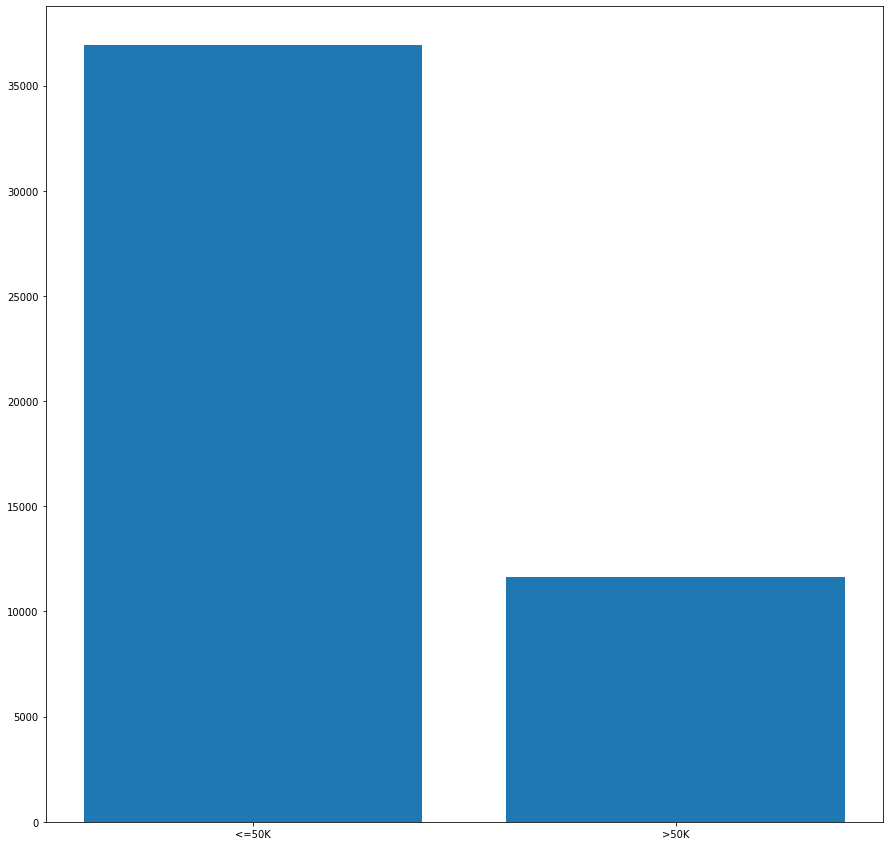

In [96]:
unique2, counts2 = np.unique(y_df_2, return_counts=True)
plt.bar(unique2,counts2)

De acuerdo a las investigaciones realizadas acerca de las técnicas de balanceo, encontramos que en la técnica SMOTE se puede presentar un tipo de ruido al momento de realizar el sobremuestreo, por eso se propone la técnica SMOTEENN, la cual realiza un sobremuestreo y luego un submuestreo y asi disminuir el ruido. Por tanto se utiliza la técnica SMOTEENN

In [97]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN 

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
#Dividimos la muestra en entrenamiento y testeo
test_size = 0.3
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size = test_size, stratify=y)

Después de realizar la división en entrenamiento y testeo y dado que existen desbalance en las categorias, se procedera a aplicar la técnica de SMOTEENN en cada uno de los conjuntos obtenidos en la selección de características

**Balanceando el Dataset del Análisis Estadístico**

In [100]:
train_XAS=train_X.copy(deep=True)
train_XAS=train_XAS[columns_AS]
train_XAS

,age,hours-per-week,educational-num,capital_total,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,education_1,education_2,education_4,education_5,education_6,education_7,education_8,education_9,education_10,education_11,education_13,education_14,education_15,education_16,marital-status_1,marital-status_2,marital-status_3,marital-status_4,marital-status_5,marital-status_6,marital-status_7,occupation_1,occupation_2,occupation_3,occupation_4,occupation_5,occupation_6,occupation_7,occupation_8,occupation_9,occupation_10,occupation_11,occupation_12,occupation_13,relationship_1,relationship_2,relationship_3,relationship_4,relationship_5,relationship_6,race_1,race_2,race_3,race_4,race_5,gender_1,gender_2,native-country_1,native-country_2,native-country_3,native-country_4,native-country_5,native-country_10,native-country_11,native-country_12,native-country_13,native-country_15,native-country_16,native-country_17,native-country_21,native-country_23,native-country_24,native-country_25,native-country_28,native-country_30,native-country_32,native-country_37,native-country_38,native-country_39,native-country_40
27819,0.609496,1.579946,1.914436,0.895787,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29139,-1.359816,-1.244612,-0.419335,-0.132642,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
48253,0.317746,-0.034087,1.914436,13.244303,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41953,0.244808,-0.034087,-0.419335,-0.132642,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
26126,-1.141004,-0.034087,-0.030373,-0.132642,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36921,-0.265754,-0.034087,-0.030373,-0.132642,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14478,0.755371,0.772930,1.136512,-0.132642,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
40063,-0.046942,-0.034087,-0.030373,-0.132642,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
24896,-0.411629,0.369421,-1.586221,-0.132642,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [101]:
#Balanceo del dataset de entrenamiento de Análisis estadístico
sme = SMOTEENN(random_state=42)
X_resAS, y_resAS = sme.fit_resample(train_XAS, train_y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [102]:
#Convirtiendo los resultados de SMOTEENN en un data frame
X_resAS=pd.DataFrame(data=X_resAS,columns=columns_AS)
y_resAS=pd.DataFrame(data=y_resAS,columns=['income'])

In [103]:
#Imprimiendo el resultado de la división 
DataSetXAS=X_resAS.copy(deep=True)
DataSetXAS["income"]=y_resAS
#DataSetXAS.to_csv('/content/gdrive/My Drive/Trabajo1/Ingresos_de_Adultos_AS.csv')
DataSetXAS.to_csv('/content/gdrive/My Drive/Piedrahita - Valderrama - Rueda/Informe técnico II/Ingresos_de_Adultos_AS.csv')

<BarContainer object of 2 artists>

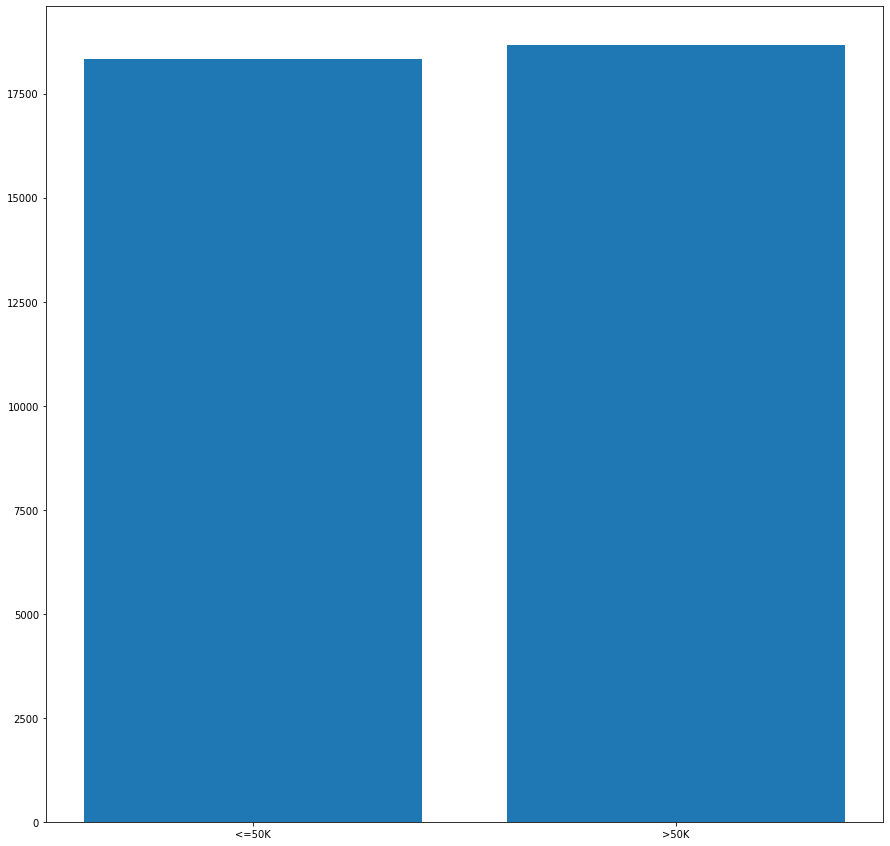

In [104]:
y_df_3 = pd.DataFrame(y_resAS)
y_df_3['income'].replace(0, '<=50K', inplace=True)
y_df_3['income'].replace(1, '>50K', inplace=True)
#A continuación se grafica nuevamente para identificar el balanceo
unique, counts = np.unique(y_df_3, return_counts=True)
plt.bar(unique,counts)

In [105]:
y_resAS['income'].replace('<=50K',0, inplace=True)
y_resAS['income'].replace('>50K',1, inplace=True)

**Balanceo el dataset de RFE**

In [106]:
train_XRFE=train_X.copy(deep=True)
train_XRFE=train_XRFE[columns_RFE]
train_XRFE

,age,hours-per-week,educational-num,capital_total,fnlwgt,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,education_2,education_3,education_4,education_6,education_8,education_9,education_12,marital-status_1,marital-status_2,marital-status_3,marital-status_4,marital-status_5,occupation_1,occupation_2,occupation_3,occupation_4,occupation_5,occupation_6,occupation_7,occupation_8,occupation_9,occupation_10,occupation_12,occupation_13,relationship_1,relationship_2,relationship_3,relationship_4,relationship_5,relationship_6,race_1,race_2,race_3,race_5,gender_1,gender_2,native-country_1,native-country_4,native-country_7,native-country_8,native-country_25
27819,0.609496,1.579946,1.914436,0.895787,-0.360597,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0
29139,-1.359816,-1.244612,-0.419335,-0.132642,-0.374801,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0
48253,0.317746,-0.034087,1.914436,13.244303,-1.208661,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0
41953,0.244808,-0.034087,-0.419335,-0.132642,0.294612,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0
26126,-1.141004,-0.034087,-0.030373,-0.132642,-1.366886,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36921,-0.265754,-0.034087,-0.030373,-0.132642,0.384496,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0
14478,0.755371,0.772930,1.136512,-0.132642,-0.336071,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0
40063,-0.046942,-0.034087,-0.030373,-0.132642,-1.176881,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0
24896,-0.411629,0.369421,-1.586221,-0.132642,-1.161503,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0


In [107]:
#Balanceo del dataset de entrenamiento de Análisis estadístico
sme = SMOTEENN(random_state=42)
X_resRFE, y_resRFE = sme.fit_resample(train_XRFE, train_y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [108]:
#Convirtiendo los resultados de SMOTEENN en un data frame
X_resRFE=pd.DataFrame(data=X_resRFE,columns=columns_RFE)
y_resRFE=pd.DataFrame(data=y_resRFE,columns=['income'])

In [109]:
DataSetRFE = X_resRFE.copy(deep=True)
DataSetRFE["income"] = y_resRFE
DataSetRFE.to_csv('/content/gdrive/My Drive/Piedrahita - Valderrama - Rueda/Informe técnico II/Ingresos_de_Adultos_RFE.csv')

<BarContainer object of 2 artists>

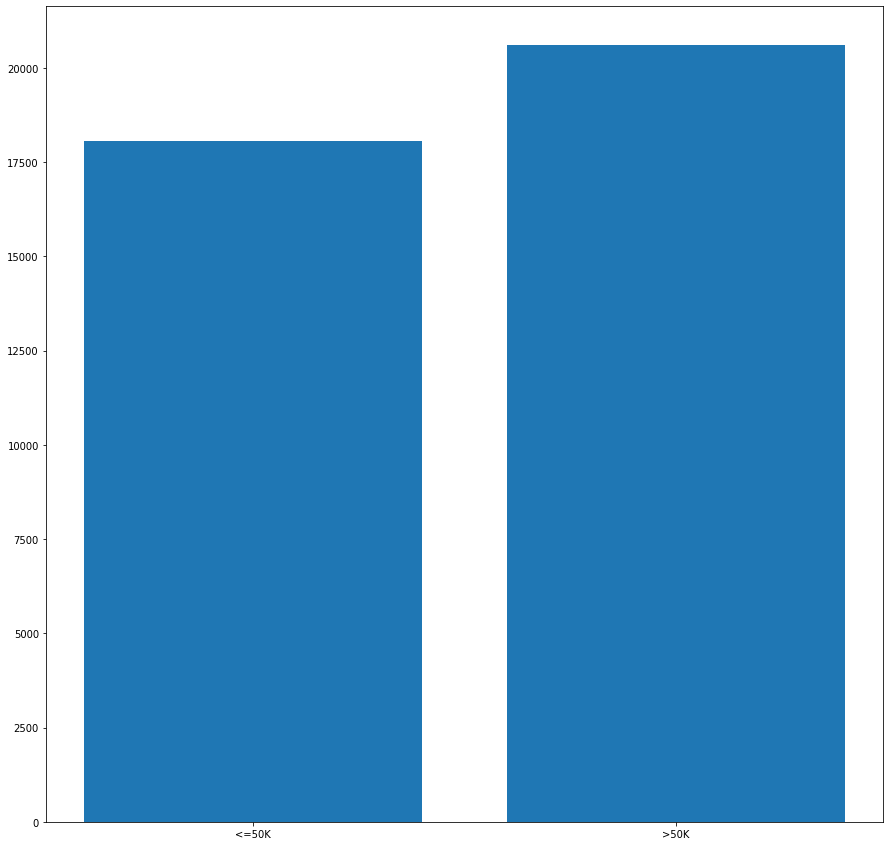

In [110]:
y_df_3 = pd.DataFrame(y_resRFE)
y_df_3['income'].replace(0, '<=50K', inplace=True)
y_df_3['income'].replace(1, '>50K', inplace=True)
#A continuación se grafica nuevamente para identificar el balanceo
unique, counts = np.unique(y_df_3, return_counts=True)
plt.bar(unique,counts)

In [111]:
y_resRFE['income'].replace('<=50K',0, inplace=True)
y_resRFE['income'].replace('>50K',1, inplace=True)

**Balanceo del dataset de SVM**

In [112]:
train_Xlsvc=train_X.copy(deep=True)
train_Xlsvc=train_Xlsvc[columns_lsvc]
train_Xlsvc

,age,hours-per-week,educational-num,capital_total,fnlwgt,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,education_3,education_4,education_5,education_6,education_7,education_8,education_9,education_10,education_11,education_12,education_14,education_15,education_16,marital-status_1,marital-status_2,marital-status_3,marital-status_4,marital-status_5,marital-status_6,marital-status_7,occupation_1,occupation_2,occupation_3,occupation_4,occupation_5,occupation_6,occupation_7,...,race_3,race_4,race_5,gender_1,gender_2,native-country_1,native-country_2,native-country_3,native-country_4,native-country_5,native-country_6,native-country_7,native-country_8,native-country_9,native-country_10,native-country_11,native-country_12,native-country_13,native-country_14,native-country_15,native-country_17,native-country_18,native-country_19,native-country_20,native-country_21,native-country_22,native-country_24,native-country_25,native-country_26,native-country_27,native-country_28,native-country_31,native-country_32,native-country_33,native-country_34,native-country_35,native-country_36,native-country_38,native-country_39,native-country_40
27819,0.609496,1.579946,1.914436,0.895787,-0.360597,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29139,-1.359816,-1.244612,-0.419335,-0.132642,-0.374801,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
48253,0.317746,-0.034087,1.914436,13.244303,-1.208661,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41953,0.244808,-0.034087,-0.419335,-0.132642,0.294612,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
26126,-1.141004,-0.034087,-0.030373,-0.132642,-1.366886,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36921,-0.265754,-0.034087,-0.030373,-0.132642,0.384496,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14478,0.755371,0.772930,1.136512,-0.132642,-0.336071,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
40063,-0.046942,-0.034087,-0.030373,-0.132642,-1.176881,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
24896,-0.411629,0.369421,-1.586221,-0.132642,-1.161503,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [113]:
#Balanceo del dataset de entrenamiento de Análisis estadístico
sme = SMOTEENN(random_state=42)
X_reslsvc, y_reslsvc = sme.fit_resample(train_Xlsvc, train_y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [114]:
#Convirtiendo los resultados de SMOTEENN en un data frame
X_reslsvc=pd.DataFrame(data=X_reslsvc,columns=columns_lsvc)
y_reslsvc=pd.DataFrame(data=y_reslsvc,columns=['income'])

In [115]:
DataSetlsvc=X_reslsvc.copy(deep=True)
DataSetlsvc["income"]=y_reslsvc
DataSetlsvc.to_csv('/content/gdrive/My Drive/Piedrahita - Valderrama - Rueda/Informe técnico II/Ingresos_de_Adultos_lsvc.csv')

<BarContainer object of 2 artists>

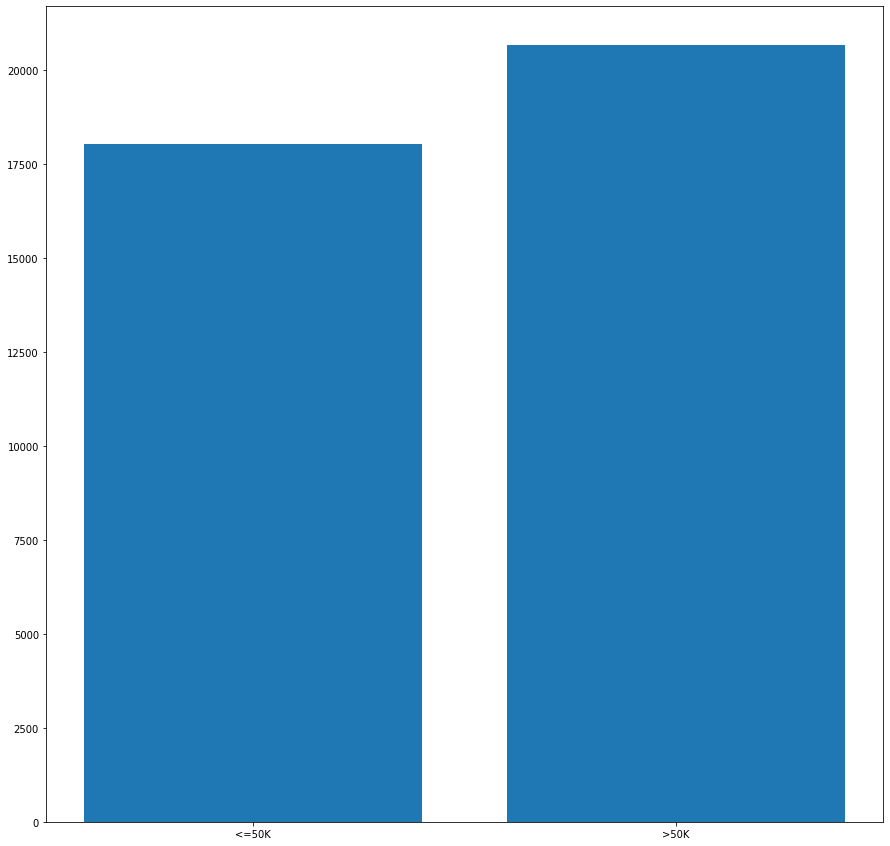

In [116]:
y_df_3 = pd.DataFrame(y_reslsvc)
y_df_3['income'].replace(0, '<=50K', inplace=True)
y_df_3['income'].replace(1, '>50K', inplace=True)
#A continuación se grafica nuevamente para identificar el balanceo
unique, counts = np.unique(y_df_3, return_counts=True)
plt.bar(unique,counts)

In [117]:
y_reslsvc['income'].replace('<=50K',0, inplace=True)
y_reslsvc['income'].replace('>50K',1, inplace=True)

**Balanceo del dataset de Lasso**

In [118]:
train_Xlasso=train_X.copy(deep=True)
train_Xlasso=train_Xlasso[columns_lasso]
train_Xlasso

,age,hours-per-week,educational-num,capital_total,fnlwgt,workclass_1,workclass_3,workclass_4,workclass_5,workclass_6,education_2,education_3,education_4,education_6,education_7,education_9,education_10,education_11,education_12,education_14,education_15,education_16,marital-status_1,marital-status_2,marital-status_4,marital-status_6,occupation_1,occupation_2,occupation_3,occupation_4,occupation_5,occupation_6,occupation_8,occupation_9,occupation_10,occupation_12,occupation_13,relationship_2,relationship_3,relationship_4,relationship_5,race_2,race_5,gender_1,native-country_1,native-country_4,native-country_8,native-country_14,native-country_15,native-country_21,native-country_25
27819,0.609496,1.579946,1.914436,0.895787,-0.360597,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0
29139,-1.359816,-1.244612,-0.419335,-0.132642,-0.374801,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0
48253,0.317746,-0.034087,1.914436,13.244303,-1.208661,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0
41953,0.244808,-0.034087,-0.419335,-0.132642,0.294612,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0
26126,-1.141004,-0.034087,-0.030373,-0.132642,-1.366886,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36921,-0.265754,-0.034087,-0.030373,-0.132642,0.384496,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0
14478,0.755371,0.772930,1.136512,-0.132642,-0.336071,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0
40063,-0.046942,-0.034087,-0.030373,-0.132642,-1.176881,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0
24896,-0.411629,0.369421,-1.586221,-0.132642,-1.161503,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0


In [119]:
#Balanceo del dataset de entrenamiento de Análisis estadístico
sme = SMOTEENN(random_state=42)
X_reslasso, y_reslasso = sme.fit_resample(train_Xlasso, train_y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [120]:
#Convirtiendo los resultados de SMOTEENN en un data frame
X_reslasso=pd.DataFrame(data=X_reslasso,columns=columns_lasso)
y_reslasso=pd.DataFrame(data=y_reslasso,columns=['income'])

In [121]:
DataSetLasso = X_reslasso.copy(deep=True)
DataSetLasso["income"] = y_reslasso
DataSetLasso.to_csv('/content/gdrive/My Drive/Piedrahita - Valderrama - Rueda/Informe técnico II/Ingresos_de_Adultos_Lasso.csv')

<BarContainer object of 2 artists>

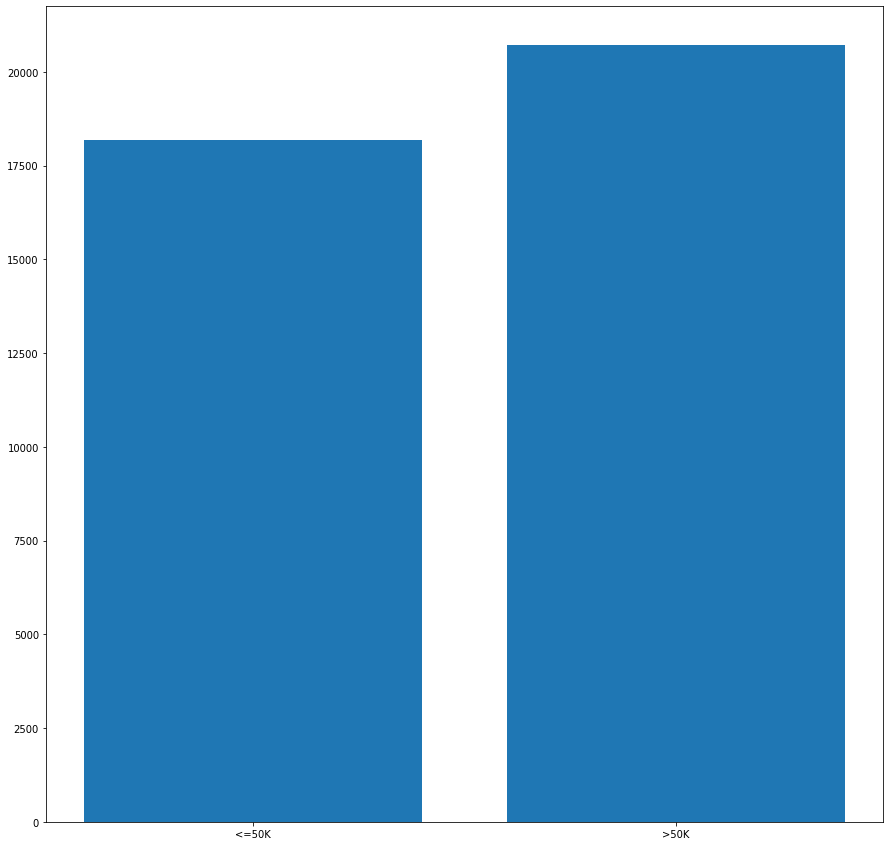

In [122]:
y_df_3 = pd.DataFrame(y_reslasso)
y_df_3['income'].replace(0, '<=50K', inplace=True)
y_df_3['income'].replace(1, '>50K', inplace=True)
#A continuación se grafica nuevamente para identificar el balanceo
unique, counts = np.unique(y_df_3, return_counts=True)
plt.bar(unique,counts)

In [123]:
y_reslasso['income'].replace('<=50K',0, inplace=True)
y_reslasso['income'].replace('>50K',1, inplace=True)

In [124]:
#Se almacena el DataFrame en un CSV X con todas las caracteristicas
DataSetAllF = train_X.copy(deep=True)
DataSetAllF["income"] = train_y
DataSetAllF.to_csv('/content/gdrive/My Drive/Piedrahita - Valderrama - Rueda/Informe técnico II/Ingresos_de_Adultos_Todo.csv')

# Entrenamiento del modelo

In [125]:
#Imprimiendo el dataset de test
Data_test=test_X.copy(deep=True)
Data_test["income"]=test_y
Data_test.to_csv('/content/gdrive/My Drive/Piedrahita - Valderrama - Rueda/Informe técnico II/Data_test.csv')

In [126]:
#test_X=Data_test.drop(['income'],axis=1)
#test_X

In [127]:
#Dependiendo de la selección de caracteristicas a evaluar se llena train_X
#Todas las caracteristicas
#train_X=X_res
#colum=X_res.columns

#Análisis estadístico
#train_X=X_resAS
#colum=X_AS.columns
#train_y=pd.DataFrame(y_resAS)
#test_y=pd.DataFrame(test_y)

#RFE
#train_X=X_resRFE
#colum=X_RFE.columns
#train_y=pd.DataFrame(y_resRFE)
#test_y=pd.DataFrame(test_y)

#Support Vector Machine
#train_X=X_reslsvc
#colum=X_lsvc.columns
#train_y=pd.DataFrame(y_reslsvc)
#test_y=pd.DataFrame(test_y)

#Lasso
train_X=X_reslasso
colum=X_lasso.columns
train_y=pd.DataFrame(y_reslasso)
test_y=pd.DataFrame(test_y)

In [128]:
#Filtrando en X_test las columnas seleccionadas
test_X=test_X[colum]

In [129]:
test_X

,age,hours-per-week,educational-num,capital_total,fnlwgt,workclass_1,workclass_3,workclass_4,workclass_5,workclass_6,education_2,education_3,education_4,education_6,education_7,education_9,education_10,education_11,education_12,education_14,education_15,education_16,marital-status_1,marital-status_2,marital-status_4,marital-status_6,occupation_1,occupation_2,occupation_3,occupation_4,occupation_5,occupation_6,occupation_8,occupation_9,occupation_10,occupation_12,occupation_13,relationship_2,relationship_3,relationship_4,relationship_5,race_2,race_5,gender_1,native-country_1,native-country_4,native-country_8,native-country_14,native-country_15,native-country_21,native-country_25
12228,-0.557504,-1.083209,-0.419335,-0.132642,0.071294,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0
45062,-1.068066,-1.970927,1.136512,-0.132642,-0.974586,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
37816,-0.995129,-0.034087,-1.975183,-0.132642,0.112827,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0
42082,-0.338691,2.548367,-0.419335,-0.132642,0.079798,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0
45806,-0.119879,-0.034087,-0.030373,-0.132642,-0.015105,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21767,-0.046942,-0.034087,-0.030373,-0.132642,-0.810301,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0
41081,-0.119879,0.772930,-0.030373,0.454076,-0.010427,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0
6619,1.849433,3.113278,-0.419335,-0.368347,-1.362539,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0
15068,-0.703379,-0.034087,-0.419335,-0.132642,2.088501,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0


In [130]:
train_X

,age,hours-per-week,educational-num,capital_total,fnlwgt,workclass_1,workclass_3,workclass_4,workclass_5,workclass_6,education_2,education_3,education_4,education_6,education_7,education_9,education_10,education_11,education_12,education_14,education_15,education_16,marital-status_1,marital-status_2,marital-status_4,marital-status_6,occupation_1,occupation_2,occupation_3,occupation_4,occupation_5,occupation_6,occupation_8,occupation_9,occupation_10,occupation_12,occupation_13,relationship_2,relationship_3,relationship_4,relationship_5,race_2,race_5,gender_1,native-country_1,native-country_4,native-country_8,native-country_14,native-country_15,native-country_21,native-country_25
0,-1.359816,-1.244612,-0.419335,-0.132642,-0.374801,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.244808,-0.034087,-0.419335,-0.132642,0.294612,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.141004,-0.034087,-0.030373,-0.132642,-1.366886,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.776316,-0.034087,1.136512,0.783554,-1.433247,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.849254,1.579946,-1.586221,-0.132642,1.221319,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38891,0.243078,1.420458,-0.419335,-0.132642,-0.230362,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
38892,1.630398,0.637604,-0.419335,-0.132642,-0.458168,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
38893,0.114330,0.730340,-0.030373,0.843617,0.625350,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
38894,1.724358,0.231031,-2.225123,-0.168143,-0.633964,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.821291,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [131]:
train_y

,income
0,0
1,0
2,0
3,0
4,0
...,...
38891,1
38892,1
38893,1
38894,1


In [132]:
test_y

,income
12228,0
45062,0
37816,0
42082,0
45806,1
...,...
21767,0
41081,1
6619,0
15068,0


## **Regresión logística**

**Entrenamiento del modelo**

In [133]:
# Entrenar el modelo de regresión logística con la base de entrenamiento
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Instantiate the model
lg = LogisticRegression(solver='liblinear', random_state=0)

# Ajustar el modelo
lg.fit(train_X, train_y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

**Predicción de resultados y cálculo de la exactitud de la variable de resultado utilizando la base de prueba**

In [134]:
# Se obtienen los valores ajustados de y (y_pred_lg) a partir de la base de prueba (X_test)
y_pred_lg = lg.predict(test_X)
y_pred_lg

array([0, 0, 0, ..., 0, 1, 0])

In [135]:
# Se calcula el score de la exactitud de los resultados
from sklearn.metrics import accuracy_score
print('Exactitud del modelo: {0:0.4f}'. format(accuracy_score(test_y, y_pred_lg)))

Exactitud del modelo: 0.7740


**Predicción de resultados y cálculo de la exactitud de la variable de resultado utilizando la base de entrenamiento**

In [136]:
# Se obtienen los valores ajustados de y (y_pred_lg) a partir de la base de entrenamiento (X_train)
y_pred_train_lg = lg.predict(train_X)
y_pred_train_lg

array([0, 0, 0, ..., 1, 0, 1])

In [137]:
# Se calcula el score de la exactitud de los resultados
from sklearn.metrics import accuracy_score
print('Exactitud de la base de entrenamiento: {0:0.4f}'. format(accuracy_score(train_y, y_pred_train_lg)))

Exactitud de la base de entrenamiento: 0.9220


**Comprobar sobreajuste o subajuste**

Se puede observar que no hay evidencia de sobreajsute

In [138]:
# Imprime los accuracy scores
print('Exactitud de la base de entrenamiento: {:.4f}'.format(lg.score(train_X, train_y)))
print('Exactitud del modelo: {:.4f}'.format(lg.score(test_X, test_y)))

Exactitud de la base de entrenamiento: 0.9220
Exactitud del modelo: 0.7740


**Comparación entre la exactitud del modelo y la exactitud nula**

Se compara la exactitud del modelo con la exactitud nula, que hace referencia a la exactitud que se alcanza prediciendo siempre la clase más frecuente

In [139]:
# Se comprueba la distribución de las clases en la base de prueba
s_50 = test_y[(test_y.income == 1)]
i_50 = test_y[(test_y.income == 0)]

In [140]:
s_50 = s_50.shape[0]
i_50 = i_50.shape[0]

Se obtiene el score de exactitud de la clase más frecuente.

In [141]:
if s_50 > i_50:
  null_accuracy = (s_50/(s_50 + i_50))
  model_accuracy_lg = lg.score(test_X, test_y)
  print('Exactitud nula: {0:0.4f}'. format(null_accuracy))
  print('Exactitud del modelo: {:.4f}'.format(lg.score(test_X, test_y)))
else:
  null_accuracy = (i_50/(s_50 + i_50))
  model_accuracy_lg = lg.score(test_X, test_y)
  print('Exactitud nula: {0:0.4f}'. format(null_accuracy))
  print('Exactitud del modelo: {:.4f}'.format(lg.score(test_X, test_y)))

Exactitud nula: 0.7605
Exactitud del modelo: 0.7740


Se verifica si el modelo estimado es más exacto que la exactitud nula

In [142]:
if model_accuracy_lg > null_accuracy:
  print("El modelo estimado predice bien las clases")
else:
  print("El modelo estimado no predice bien las clases")

El modelo estimado predice bien las clases


**Matriz de confusión**

In [143]:
# Imprime la matriz de confusión y la divide en cuatro partes
from sklearn.metrics import confusion_matrix

cm_lg = confusion_matrix(test_y, y_pred_lg)
#print('Confusion matrix\n\n', cm)
print('Confusion matrix\n\n', cm_lg)
print('\nVerdaderos Positivos(VP) = ', cm_lg[0,0])
print('\nVerdaderos negativos(TN) = ', cm_lg[1,1])
print('\nFalsos positivos(FP) = ', cm_lg[0,1])
print('\nFalsos negativos(FN) = ', cm_lg[1,0])

Confusion matrix

 [[8171 2906]
 [ 386 3102]]

Verdaderos Positivos(VP) =  8171

Verdaderos negativos(TN) =  3102

Falsos positivos(FP) =  2906

Falsos negativos(FN) =  386


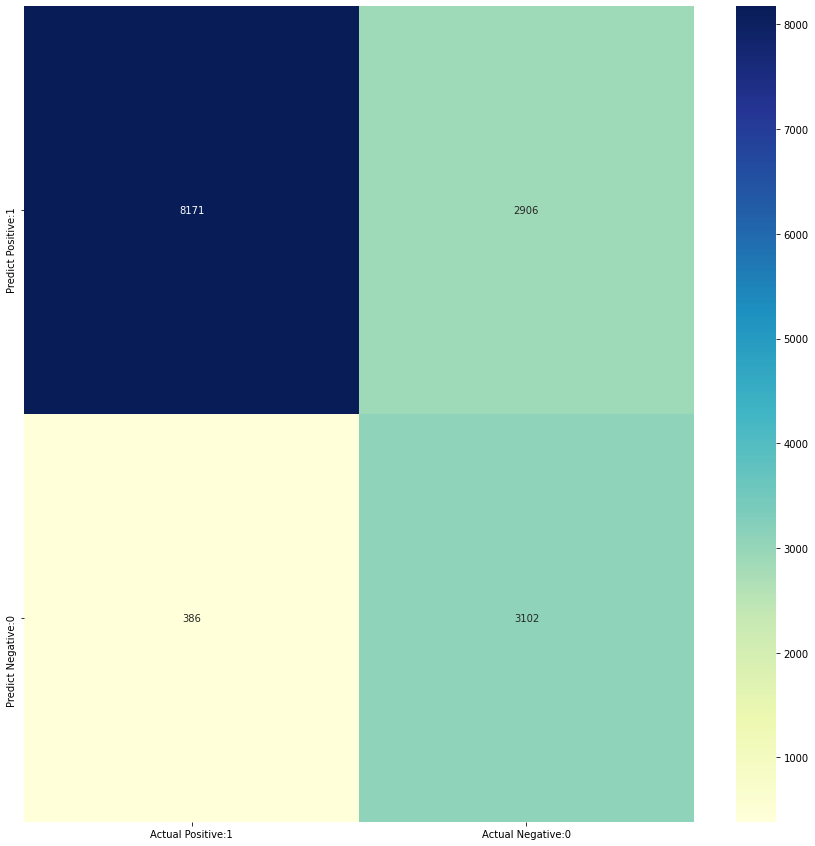

In [144]:
# Visualización de la matriz de confusión en un mapa de calor de Seaborn

cm_lg_matrix = pd.DataFrame(data=cm_lg, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_lg_matrix, annot=True, fmt='d', cmap='YlGnBu')

**Reporte de clasificación**

En el reporte de clasificación se muestran las medidas de evaluación del modelo, tales como la precisión, la sensibilidad, el F1 y el soporte.

In [145]:
from sklearn.metrics import classification_report
print(classification_report(test_y, y_pred_lg))

              precision    recall  f1-score   support

           0       0.95      0.74      0.83     11077
           1       0.52      0.89      0.65      3488

    accuracy                           0.77     14565
   macro avg       0.74      0.81      0.74     14565
weighted avg       0.85      0.77      0.79     14565



**Exactitud de clasificación**

In [146]:
# Partes de la matriz de confusión
VP = cm_lg[0,0]
VN = cm_lg[1,1]
FP = cm_lg[0,1]
FN = cm_lg[1,0]

# Imprime el puntaje de exactitud de clasificación
classification_accuracy = (VP + VN) / float(VP + VN + FP + FN)
print('Exactitud de clasificación : {0:0.4f}'.format(classification_accuracy))

Exactitud de clasificación : 0.7740


**Cálculo de las probabilidades de clase**

In [147]:
# Imprime las diez primeras probabilidades estimadas de las dos clases
y_pred_lg_prob = lg.predict_proba(test_X)[0:10]
y_pred_lg_prob

array([[9.99266155e-01, 7.33844593e-04],
       [9.97939219e-01, 2.06078051e-03],
       [9.99581640e-01, 4.18360272e-04],
       [5.06733189e-02, 9.49326681e-01],
       [1.18877131e-01, 8.81122869e-01],
       [9.53934748e-01, 4.60652523e-02],
       [9.93638269e-01, 6.36173107e-03],
       [4.95739242e-01, 5.04260758e-01],
       [9.99991414e-01, 8.58556305e-06],
       [2.05908127e-02, 9.79409187e-01]])

In [148]:
# Guardar las probabilidades en un dataframe
y_pred_lg_prob_df = pd.DataFrame(data=y_pred_lg_prob, columns=['Prob de <=50K', 'Prob de >50K'])
y_pred_lg_prob_df

,Prob de <=50K,Prob de >50K
0,0.999266,0.000734
1,0.997939,0.002061
2,0.999582,0.000418
3,0.050673,0.949327
4,0.118877,0.881123
5,0.953935,0.046065
6,0.993638,0.006362
7,0.495739,0.504261
8,0.999991,0.000009
9,0.020591,0.979409


**Histograma de probabilidad de salario mayor a 50k**

Text(0, 0.5, 'Frecuencia')

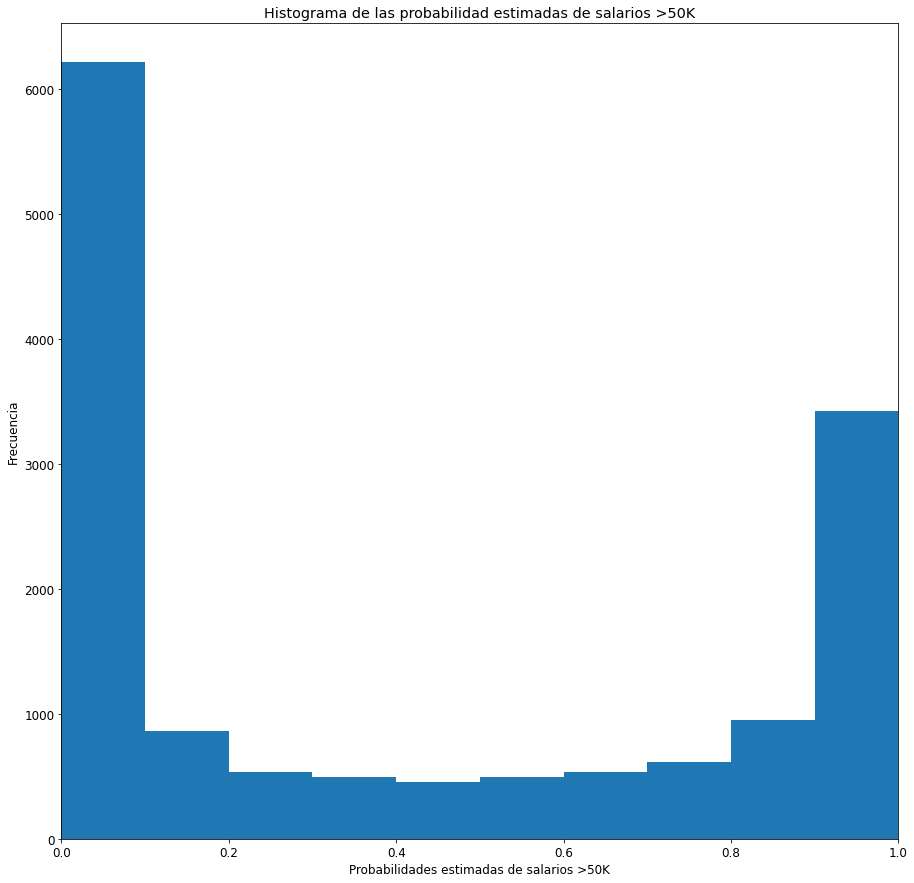

In [149]:
# Almacena las probabilidad estimadas para la clase 1 - Probabilidad de >50K
y_pred1_lg = lg.predict_proba(test_X)[:, 1]

# Grafica un histograma de probabilidad estimadas:

# Ajuste del tamaño de la fuente
plt.rcParams['font.size'] = 12

# Grafica histograga con 10 bins
plt.hist(y_pred1_lg, bins = 10)

# Título del histograma 
plt.title('Histograma de las probabilidad estimadas de salarios >50K')

# Fijar el límite del eje x
plt.xlim(0,1)

# Títulos de los ejes
plt.xlabel('Probabilidades estimadas de salarios >50K')
plt.ylabel('Frecuencia')

**ROC - AUC**

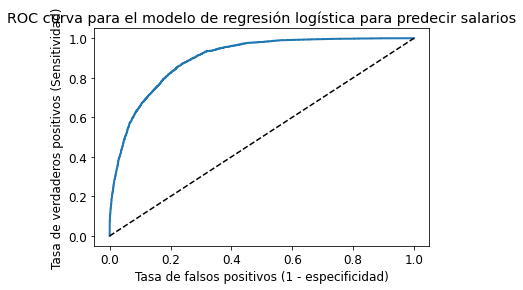

In [150]:
# Grafica la curva ROC

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_y, y_pred1_lg, pos_label = 1)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curva para el modelo de regresión logística para predecir salarios')
plt.xlabel('Tasa de falsos positivos (1 - especificidad)')
plt.ylabel('Tasa de verdaderos positivos (Sensitividad)')
plt.show()

In [151]:
# Cálculo de ROC AUC
from sklearn.metrics import roc_auc_score
ROC_AUC_lg = roc_auc_score(test_y, y_pred1_lg)
print('ROC AUC : {:.4f}'.format(ROC_AUC_lg))

ROC AUC : 0.8977


In [152]:
# Cálculo de cross-validated ROC AUC 
from sklearn.model_selection import cross_val_score
Cross_validated_ROC_AUC_lg = cross_val_score(lg, train_X, train_y, cv=5, scoring='roc_auc').mean()
print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC_lg))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Cross validated ROC AUC : 0.9770


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [153]:
print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC_lg))

Cross validated ROC AUC : 0.9770


In [154]:
# Aplicando 10-Fold Cross Validation
from sklearn.model_selection import cross_val_score
scores_lg = cross_val_score(lg, train_X, train_y, cv = 10, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores_lg))

# Calculando el promedio de cross-validation scores
print('Average cross-validation score: {:.4f}'.format(scores_lg.mean()))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Cross-validation scores:[0.92596401 0.93007712 0.92647815 0.91722365 0.92005141 0.91568123
 0.92723065 0.91797377 0.91360247 0.92003086]
Average cross-validation score: 0.9214


In [155]:
print('Cross-validation scores:{}'.format(scores_lg))
# Calculando el promedio de cross-validation scores
print('Average cross-validation score: {:.4f}'.format(scores_lg.mean()))

Cross-validation scores:[0.92596401 0.93007712 0.92647815 0.91722365 0.92005141 0.91568123
 0.92723065 0.91797377 0.91360247 0.92003086]
Average cross-validation score: 0.9214
